# CSCA 5632 - Introduction to Unsupervised Learning - Final Project
## University of Colorado Boulder

---

## Dyego Fernandes de Sousa

---

### Problem Statement

This is my final project for the **CSCA 5632 - Introduction to Unsupervised Learning** course at University of Colorado Boulder, in which I showcase techiques ofunsupervised learning techniques to discover hidden patterns and latent features in brand-level data, combining ESG (Environmental, Social, Governance) metrics with consumer demographics, operational characteristics, and market positioning, to produce as many groups as possible.

*This is a continuation of my final project for CSCA 5622 - Introducion to Supervised Learning*

#### The Hypothesis:
If a company or conglomerate is compliant with ESG practices, does that indicate that all of their brands also comply? What about the inverse case, can I find a case where a brand is ESG focused despite of the parent company evident disregard for it?

This is a job for the Un**_SUPER_**vised Learning (You can laugh now...).

#### The Central Question

**Are there any natural segments and/or patterns that emerge when I analyze brands across multiple dimensions simultaneously?**

Rather than imposing predefined categories (Supervised Learning approach), this project uses unsupervised learning to let the data reveal:
- **Natural groupings** (Clusters) of brands based on their multi-dimensional characteristics
- **Latent features** that drive brand differentiation
- **Unusual patterns** and outliers that don't fit conventional categorizations
- **Relationships** between environmental performance, market positioning, and consumer targeting

#### Objectives

Using the techiques of **unsupervised learning**, apply them to:

1. **Discover latent features** underlying brand differentiation:
   - Use **PCA** to identify principal components that explain variance in the data
   - Interpret these components as meaningful business dimensions
   - Understand **which** (if any) features contribute most to brand differentiation

2. **Identify natural brand segments** that emerge from the data:
   - Cluster brands based on:
     - **Company-level** environmental metrics (emissions, environmental risks, ESG performance)
     - Brand **demographics** and target markets (age groups, income levels, lifestyle segments)
     - Operational **characteristics** (business model, scale, geographic reach)
     - **Market positioning** (pricing, sustainability initiatives, innovation)
   - Profile each segment to **understand** what makes them distinct

3. **Find patterns and anomalies**:
   - Brands that **align** with their parent company's profile vs. those that **diverge**
   - **Unusual combinations** of features (e.g., premium pricing with low ESG investment)
   - Outlier brands with **unique** characteristic profiles
   - **Relationships** between sustainability positioning and market success

---

### Dataset

**Primary Dataset:** `brand_information.csv` - Comprehensive brand-level dataset, based on my **Supervised Learning project**.

This dataset contains:
- **Industry & Company Data**: ESG scores, emissions (scope1+2), revenues, environmental risk indicators
- **Brand Demographics**: Age group targeting, income levels, lifestyle segments
- **Operational Features**: Franchise model, online sales, fleet ownership, drive-through
- **Sustainability Metrics**: Electric vehicle %, ESG programs, sustainability awards, R&D spending

**Dataset Size:**
- 3,600+ brands across multiple industries and parent companies
- 77 features

---

### Methodology

1. **Data Loading and Preprocessing**: Load comprehensive brand dataset, handle missing values
2. **Feature Engineering**: Create derived features capturing ESG risk and brand-company alignment
3. **Feature Selection**: Select relevant features across ESG, demographic, operational, and market dimensions
4. **Feature Scaling**: Standardize features for clustering algorithms
5. **Dimensionality Reduction**:
   - **PCA** for variance reduction and **latent feature discovery**
   - **Component interpretation** to understand discovered dimensions
   - t-SNE for 2D visualization
6. **Hyperparameter Tuning**: Systematic optimization of clustering parameters
   - Grid search for K-Means, Hierarchical, and DBSCAN
   - Multi-metric evaluation (Silhouette, Calinski-Harabasz, Davies-Bouldin)
7. **Clustering with Optimized Parameters**:
   - K-Means for spherical clusters
   - Hierarchical Clustering for nested structures
   - DBSCAN for outlier detection
8. **Cluster Interpretation**: Profile segments and extract business insights
9. **Validation**: Compare algorithms and validate cluster quality

---

### Project Structure

The implementation uses modular Python files:
- `clustering_models.py` - K-Means, Hierarchical, DBSCAN + HyperparameterTuner
- `dimensionality_reduction.py` - PCA and t-SNE with component analysis
- `visualization_utils.py` - Plotting and visualization functions


## Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

# Auto-reload modules
%load_ext autoreload
%autoreload 2

# Import project modules
from clustering_models import BrandClusterer
from dimensionality_reduction import DimensionalityReducer
from visualization_utils import ClusterVisualizer

# Import hyperparameter tuner
from clustering_models import HyperparameterTuner

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

---
## Phase 1: Data Loading


In [2]:
# Load the comprehensive brand information dataset
df = pd.read_csv('data/raw/brand_information.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns ({len(df.columns)} total):")
print(df.columns.tolist())

print("\n" + "="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Total brands: {len(df)}")
print(f"Unique companies: {df['company_name'].nunique()}")
print(f"Unique industries: {df['industry_name'].nunique()}")

print("\nFirst few rows:")
df.head()

Dataset shape: (3605, 77)

Columns (77 total):
['industry_id', 'industry_name', 'deforestation_risk', 'labor_exploitation_risk', 'chemical_pollution_risk', 'supply_chain_greenwashing_risk', 'positive_innovation_risk', 'esg_summary', 'company_id', 'company_name', 'scope_v_revenues', 'reported_scope', 'emissions_rank', 'in_industry_rank', 'global_rank', 'exclusions', 'initial_greenwashing_level', 'greenwashing_factor_1', 'greenwashing_factor_2', 'greenwashing_factor_3', 'greenwashing_factor_4', 'accusation', 'revenues', 'scope12_total', 'brand_id', 'brand_name', 'id', 'brand_id.1', 'brand_name.1', 'country_of_origin', 'year_of_foundation', 'headquarters_country', 'parent_company', 'employees', 'age_prenatal', 'age_0_5', 'age_6_12', 'age_teens', 'age_young_adults', 'age_seniors', 'demographics_income_level', 'income_low', 'income_middle', 'income_high', 'income_premium', 'income_snap_support', 'demographics_geographic_reach', 'demographics_gender', 'demographics_lifestyle', 'lifestyle_fam

,industry_id,industry_name,deforestation_risk,labor_exploitation_risk,chemical_pollution_risk,supply_chain_greenwashing_risk,positive_innovation_risk,esg_summary,company_id,company_name,scope_v_revenues,reported_scope,emissions_rank,in_industry_rank,global_rank,exclusions,initial_greenwashing_level,greenwashing_factor_1,greenwashing_factor_2,greenwashing_factor_3,greenwashing_factor_4,accusation,revenues,scope12_total,brand_id,brand_name,id,brand_id.1,brand_name.1,country_of_origin,year_of_foundation,headquarters_country,parent_company,employees,age_prenatal,age_0_5,age_6_12,age_teens,age_young_adults,age_seniors,demographics_income_level,income_low,income_middle,income_high,income_premium,income_snap_support,demographics_geographic_reach,demographics_gender,demographics_lifestyle,lifestyle_family,lifestyle_youth,lifestyle_seniors,lifestyle_health_focused,lifestyle_convenience,lifestyle_tech_savvy,lifestyle_sustainability_conscious,online_sales,has_franchises,has_drive_through,owns_fleet,electric_vehicles_percent,fossil_fuel_reliance,esg_programs,sustainability_actions,target_population,main_partnerships,branding_innovation_level,supply_chain_localization,product_portfolio_diversity,revenue_billion_usd,customer_loyalty_index,r_and_d_spend_percent_revenue,women_board_percent,ceo_tenure_years,market_cap_billion_usd,major_sustainability_award_last5y,references_and_links
0,10,Household & Personal Products,1,1,1,0,0,Household & Personal Products industry demonst...,125,"S. C. Johnson & Son, Inc.",0.0000,0,20,21,20,0,1.0,-0.1,-0.85,0.0,0.35,NaN,11000,0,344687,00 Null Null,1,344687,00 Null Null,Germany,2010,Germany,Private German cleaning products company,80,0,0,0,0,0,0,B2B/Consumer cleaning products,0,0,0,0,0,"Europe (Germany, Switzerland primarily)",N/A - cleaning products,N/A - cleaning/hygiene products,0,0,0,0,0,0,0,1,0,0,0,0,Moderate; chemical manufacturing,Limited,Minimal,European consumers seeking toilet/bathroom cle...,"European retailers, distributors",1,85,2,0.04,55,0.5,20,3,0.0,0,https://www.galaxus.ch; Limited English sources
1,6,Processed Foods,1,1,1,0,0,Processed foods industry demonstrates ESG para...,51,Ferrero Group,43.1106,1,19,16,16,1,0.6,-0.1,0.40,0.0,0.35,NaN,12700,547505,342833,100 Grand,2,342833,100 Grand,United States,1964,United States,Ferrero SpA [finance:Ferrero SpA] (acquired 20...,100,0,1,1,1,1,0,"All income levels, candy consumers",1,1,1,0,1,"United States (national), some international",All genders,"Candy enthusiasts, convenience seekers, all ages",1,1,1,0,1,0,0,1,0,0,0,0,Minimal; candy brand,Limited; inherited from Ferrero,Packaging optimization efforts,"Candy lovers, all ages, all income levels","Ferrero (parent), retailers, convenience store...",1,40,1,0.18,65,0.8,25,2,0.0,0,https://en.wikipedia.org/wiki/100_Grand_Bar
2,17,"Meat, Poultry & Dairy",1,1,1,0,0,"Meat, Poultry & Dairy industry faces severe ES...",96,Foremost Farms USA Cooperative,0.0000,0,18,19,18,0,1.0,-0.1,-0.90,0.0,0.35,NaN,1700,0,342921,1950 127 Cheese,4,342921,1950 127 Cheese,United States,1950,United States,"Foremost Farms USA (dairy cooperative, sold to...",45,0,0,0,0,0,0,B2B foodservice,0,0,0,0,0,U.S. foodservice sector,N/A - B2B,N/A - B2B,0,0,0,0,0,0,0,0,0,0,0,0,Moderate; dairy production,Limited; cooperative model,Dairy sustainability programs,"Foodservice operators, cheese buyers","Wisconsin Dairy Distributing (new owner), food...",0,90,1,0.02,70,0.1,15,4,0.0,0,https://www.foremostfarms.com/foremost-farms-a...
3,6,Processed Foods,1,1,1,0,0,Processed foods industry demonstrates ESG para...,95,"Wells Enterprises, Inc.",0.0000,0,38,38,38,0,1.0,-0.1,-0.70,0.0,0.35,NaN,1000,0,345200,2nd Street Creamery,5,345200,2nd Street Creamery,United States,1995,United States,Private ice cream company,35,0,1,1,1,1,0,"All income levels, ice cream consumers",1,1,1,0,0,Regional U.S. (ice cream distribution),"All genders, families","Families, ice cream enthusiasts, dessert lovers",1,1,0,0,1,0,0,0,0,0,0,0,Moderate; ice cream production,Limited,Minimal

### Key Features

In [3]:
# Check data types and missing values
print("Data types and missing values:")
info_df = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Dtype': df.dtypes
})
print(info_df.to_string())

# Summary statistics for key numeric columns
print("\n" + "="*60)
print("KEY NUMERIC VARIABLES")
print("="*60)

key_numeric = ['scope12_total', 'revenues', 'employees', 'revenue_billion_usd', 
               'electric_vehicles_percent', 'customer_loyalty_index']
available_numeric = [col for col in key_numeric if col in df.columns]

if available_numeric:
    print(df[available_numeric].describe())

Data types and missing values:
                                                                Column  Non-Null Count  Null Count    Dtype
industry_id                                                industry_id            3605           0    int64
industry_name                                            industry_name            3605           0   object
deforestation_risk                                  deforestation_risk            3605           0    int64
labor_exploitation_risk                        labor_exploitation_risk            3605           0    int64
chemical_pollution_risk                        chemical_pollution_risk            3605           0    int64
supply_chain_greenwashing_risk          supply_chain_greenwashing_risk            3605           0    int64
positive_innovation_risk                      positive_innovation_risk            3605           0    int64
esg_summary                                                esg_summary            3605           0   obje

In [4]:
# Categorical distributions
print("="*60)
print("CATEGORICAL DISTRIBUTIONS")
print("="*60)

# Industry distribution
print("\nIndustry Distribution:")
print(df['industry_name'].value_counts().head(10))

# By Scope 1 + 2 Total
print("\nBy Scope 1 + 2 Total:")
print(df['scope12_total'].value_counts().sort_index())

# Greenwashing levels
print("\nInitial Greenwashing Level:")
print(df['initial_greenwashing_level'].value_counts().sort_index())

# Country of origin distribution
print("\nTop 10 Countries of Origin:")
print(df['country_of_origin'].value_counts().head(10))

CATEGORICAL DISTRIBUTIONS

Industry Distribution:
industry_name
Processed Foods                                     1456
Food Retailers & Distributors                        521
Household & Personal Products                        390
Meat, Poultry & Dairy                                388
Alcoholic Beverages                                  278
Non-Alcoholic Beverages                              153
Biotechnology & Pharmaceuticals                      139
Multiline and Specialty Retailers & Distributors     117
E-commerce                                            38
Agricultural Products                                 31
Name: count, dtype: int64

By Scope 1 + 2 Total:
scope12_total
0           1243
336           11
5061           1
10353         45
19521          2
            ... 
5558685       74
5760000       38
10706567      11
14620902      12
17060000      26
Name: count, Length: 104, dtype: int64

Initial Greenwashing Level:
initial_greenwashing_level
0.0    2128
0.6     2

---
## Phase 2: Data Preprocessing and Feature Selection

### Handle Missing Values and Data Quality

In [5]:
# Create a working copy
full_df = df.copy()

# Check missing values summary
missing_summary = pd.DataFrame({
    'column': full_df.columns,
    'missing_count': full_df.isnull().sum(),
    'missing_pct': (full_df.isnull().sum() / len(full_df) * 100).round(2)
})
missing_summary = missing_summary[missing_summary['missing_count'] > 0].sort_values('missing_pct', ascending=False)

print("Missing values statistics:")
print(missing_summary.to_string(index=False))

# Handle missing values
numeric_cols = full_df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    if full_df[col].isnull().sum() > 0:
        # For ratio/percentage columns, fill with 0
        if any(keyword in col.lower() for keyword in ['percent', 'ratio', 'index']):
            full_df[col].fillna(0, inplace=True)
        else:
            # For count/size columns, fill with median
            full_df[col].fillna(full_df[col].median(), inplace=True)
            
print(f"Remaining missing values: {full_df.isnull().sum().sum()}")

Missing values statistics:
                column  missing_count  missing_pct
  references_and_links           2653        73.59
            accusation           2608        72.34
          esg_programs            146         4.05
sustainability_actions            146         4.05
  fossil_fuel_reliance            146         4.05
     target_population            146         4.05
     main_partnerships            146         4.05
   demographics_gender             12         0.33
demographics_lifestyle              3         0.08
Remaining missing values: 6006


### Feature Engineering for ESG Analysis

Create derived features that capture ESG risk and sustainability patterns.



Environmental Risk Distribution:
  Mean: 5.133
  Std: 0.882
  Min: 0.000
  Median: 5.650
  Max: 7.650


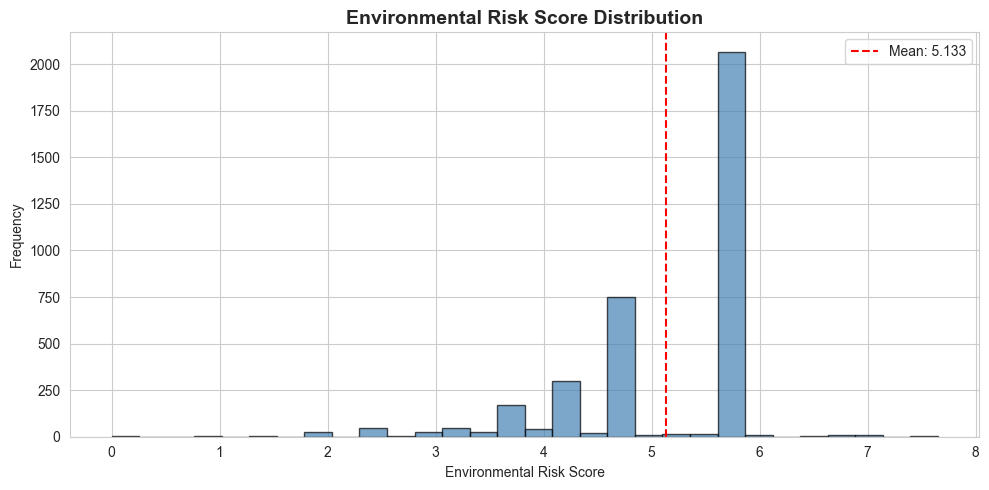

In [6]:
# Calculate ESG-related risk indicators

# Environmental risk: combine initial assessments with external factors
initial_greenwashing_risk = full_df['initial_greenwashing_level'].fillna(0)
greenwashing_factor_1 = full_df['greenwashing_factor_1'].fillna(0)
greenwashing_factor_2 = full_df['greenwashing_factor_2'].fillna(0)
greenwashing_factor_3 = full_df['greenwashing_factor_3'].fillna(0)
greenwashing_factor_4 = full_df['greenwashing_factor_4'].fillna(0)

# Greenwashing risk calculation
greenwashing_combined = (initial_greenwashing_risk + greenwashing_factor_1 + greenwashing_factor_2 + 
                     greenwashing_factor_3 + greenwashing_factor_4).clip(lower=0, upper=1)

# Other risk calculations can be added here similarly
other_risks_combined = full_df['deforestation_risk'].fillna(0) + full_df['labor_exploitation_risk'].fillna(0) + \
              full_df['chemical_pollution_risk'].fillna(0) + full_df['supply_chain_greenwashing_risk'].fillna(0) + \
              (-1 * full_df['positive_innovation_risk'].fillna(0)) + \
              full_df['branding_innovation_level'].fillna(0) + (full_df['supply_chain_localization'].fillna(0) / 100) + (full_df['product_portfolio_diversity'].fillna(0) / 10)


env_risk_combined = greenwashing_combined + other_risks_combined
full_df['environmental_risk_score'] = env_risk_combined

print(f"\nEnvironmental Risk Distribution:")
print(f"  Mean: {env_risk_combined.mean():.3f}")
print(f"  Std: {env_risk_combined.std():.3f}")
print(f"  Min: {env_risk_combined.min():.3f}")
print(f"  Median: {env_risk_combined.median():.3f}")
print(f"  Max: {env_risk_combined.max():.3f}")

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(env_risk_combined, bins=30, color='steelblue', alpha=0.7, edgecolor='black')
ax.set_title('Environmental Risk Score Distribution', fontweight='bold', fontsize=14)
ax.set_xlabel('Environmental Risk Score')
ax.set_ylabel('Frequency')
ax.axvline(env_risk_combined.mean(), color='red', linestyle='--', 
           label=f'Mean: {env_risk_combined.mean():.3f}')
ax.legend()
plt.tight_layout()
plt.show()


### Select Features for Clustering

We'll focus on features that capture:
1. **Company-level ESG**: emissions, revenues, environmental risk risk
2. **Brand demographics**: age groups, income levels, lifestyle targeting
3. **Operational characteristics**: franchises, online sales, fleet ownership
4. **Sustainability metrics**: EV%, ESG programs, sustainability awards

In [7]:
# Define feature groups
company_esg_features = ['scope12_total', 'revenues', 'environmental_risk_score',
                        'deforestation_risk', 'labor_exploitation_risk', 
                        'chemical_pollution_risk', 'supply_chain_greenwashing_risk',
                        'fossil_fuel_reliance_encoded', 'positive_innovation_risk']

# I made an abribrary decision to exclude some demographic features due to data quality issues
demographic_features = ['income_middle', 'income_high', 'income_premium','income_snap_support']
#demographic_features = ['age_prenatal', 'age_0_5', 'age_6_12', 'age_teens',
#                       'age_young_adults', 'age_seniors', 'income_low', 
#                       'income_middle', 'income_high', 'income_premium',
#                       'income_snap_support']

# I made an abribrary decision to exclude lifestyle features due to data quality issues
#lifestyle_features = ['lifestyle_family', 'lifestyle_youth', 'lifestyle_seniors',
#                     'lifestyle_health_focused', 'lifestyle_convenience',
#                     'lifestyle_tech_savvy', 'lifestyle_sustainability_conscious']
lifestyle_features = []

operational_features = ['online_sales', 'has_franchises', 'has_drive_through',
                       'owns_fleet', 'employees', 'product_portfolio_diversity_encoded',
                       'supply_chain_localization_encoded']

# I arbitrarily decided to remove 'women_board_percent' due to data quality issues and too much noise
sustainability_features = ['electric_vehicles_percent', 'major_sustainability_award_last5y',
                          'r_and_d_spend_percent_revenue', 'esg_programs_encoded', 'sustainability_actions_encoded']

# Divergence features - brand-company environmental alignment (created in Phase 3)
divergence_features = ['sustainability_positioning', 'company_env_risk',
                      'sustainability_divergence', 'premium_positioning',
                      'esg_premium_divergence']

# Market positioning features (removed 'branding_innovation_level' due to too much noise)
market_features = ['customer_loyalty_index', 
                  'market_cap_billion_usd', 'revenue_billion_usd',
                  'ceo_tenure_years', 'year_of_foundation']

# Interaction features - multi-dimensional characteristics (created in Phase 3.2)
interaction_features = ['emissions_intensity', 'esg_investment_ratio', 
                       'brand_age_log', 'revenue_per_employee',
                       'demographic_breadth', 'income_diversity',
                       'lifestyle_complexity', 'operational_complexity',
                       'market_positioning', 'env_risk_concentration']

# Combine all features
feature_columns = (company_esg_features + demographic_features + 
                  lifestyle_features + operational_features + 
                  sustainability_features + divergence_features +
                  market_features + interaction_features)

# Filter to only existing columns
feature_columns = [col for col in feature_columns if col in full_df.columns]

print(f"Selected {len(feature_columns)} features for clustering:")
print("\nFeature groups:")
print(f"  - Company ESG: {len([c for c in company_esg_features if c in full_df.columns])}")
print(f"  - Demographics: {len([c for c in demographic_features if c in full_df.columns])}")
print(f"  - Lifestyle: {len([c for c in lifestyle_features if c in full_df.columns])}")
print(f"  - Operational: {len([c for c in operational_features if c in full_df.columns])}")
print(f"  - Sustainability: {len([c for c in sustainability_features if c in full_df.columns])}")
print(f"  - Divergence (Brand-Company Alignment): {len([c for c in divergence_features if c in full_df.columns])}")
print(f"  - Market Positioning: {len([c for c in market_features if c in full_df.columns])}")
print(f"  - Interaction Features: {len([c for c in interaction_features if c in full_df.columns])}")

print(f"\n{'='*60}")
print(f"TOTAL FEATURES: {len(feature_columns)}")
print(f"{'='*60}")
print(f"\nAll features:")
for i, feat in enumerate(feature_columns, 1):
    print(f"  {i:2d}. {feat}")

Selected 25 features for clustering:

Feature groups:
  - Company ESG: 8
  - Demographics: 4
  - Lifestyle: 0
  - Operational: 5
  - Sustainability: 3
  - Divergence (Brand-Company Alignment): 0
  - Market Positioning: 5
  - Interaction Features: 0

TOTAL FEATURES: 25

All features:
   1. scope12_total
   2. revenues
   3. environmental_risk_score
   4. deforestation_risk
   5. labor_exploitation_risk
   6. chemical_pollution_risk
   7. supply_chain_greenwashing_risk
   8. positive_innovation_risk
   9. income_middle
  10. income_high
  11. income_premium
  12. income_snap_support
  13. online_sales
  14. has_franchises
  15. has_drive_through
  16. owns_fleet
  17. employees
  18. electric_vehicles_percent
  19. major_sustainability_award_last5y
  20. r_and_d_spend_percent_revenue
  21. customer_loyalty_index
  22. market_cap_billion_usd
  23. revenue_billion_usd
  24. ceo_tenure_years
  25. year_of_foundation


### Encode Categorical Features

Using manual encoding, as the dataset would produce way too many if I used `one_hot`.

In [8]:
# Encode categorical features before clustering
# Some features have text values that need to be converted to numeric

# 1. ESG Programs - Create ordinal encoding based on sophistication level
def encode_esg_programs(val):
    """Convert ESG programs to ordinal scale (0-3)"""
    if pd.isna(val):
        return 0
    val_lower = str(val).lower()
    if 'minimal' in val_lower or 'limited' in val_lower or val_lower == 'none':
        return 1
    elif 'moderate' in val_lower or 'some' in val_lower:
        return 2
    elif any(word in val_lower for word in ['strong', 'comprehensive', 'extensive', 'focus', 'programs']):
        return 3
    else:
        return 1  # Default to limited

full_df['esg_programs_encoded'] = full_df['esg_programs'].apply(encode_esg_programs)

# 2. Sustainability Actions - Create ordinal encoding
def encode_sustainability_actions(val):
    """Convert sustainability actions to ordinal scale (0-3)"""
    if pd.isna(val):
        return 0
    val_lower = str(val).lower()
    if 'minimal' in val_lower or 'none' in val_lower:
        return 1
    elif 'optimization' in val_lower or 'efforts' in val_lower:
        return 2
    elif any(word in val_lower for word in ['programs', 'initiatives', 'sustainable', 'eco-friendly']):
        return 3
    else:
        return 1  # Default to minimal

full_df['sustainability_actions_encoded'] = full_df['sustainability_actions'].apply(encode_sustainability_actions)

# 3. Fossil Fuel Reliance - Create ordinal encoding
def encode_fossil_fuel(val):
    """Convert fossil fuel reliance to ordinal scale (0-3)"""
    if pd.isna(val):
        return 0
    val_lower = str(val).lower()
    if 'minimal' in val_lower or 'low' in val_lower or 'none' in val_lower:
        return 1
    elif 'moderate' in val_lower or 'medium' in val_lower:
        return 2
    elif 'high' in val_lower or 'significant' in val_lower:
        return 3
    else:
        return 2  # Default to moderate

full_df['fossil_fuel_reliance_encoded'] = full_df['fossil_fuel_reliance'].apply(encode_fossil_fuel)

# 4. For high-cardinality categoricals, just use numeric representations if available
# product_portfolio_diversity and supply_chain_localization - if they're numeric, keep as is
# If they're categorical, create binary indicators

if full_df['product_portfolio_diversity'].dtype == 'object':
    # Try to extract numeric value or create ordinal
    def encode_diversity(val):
        if pd.isna(val):
            return 0
        try:
            return float(val)
        except:
            val_lower = str(val).lower()
            if 'high' in val_lower or 'diverse' in val_lower:
                return 3
            elif 'moderate' in val_lower or 'medium' in val_lower:
                return 2
            elif 'low' in val_lower or 'limited' in val_lower:
                return 1
            else:
                return 1
    full_df['product_portfolio_diversity_encoded'] = full_df['product_portfolio_diversity'].apply(encode_diversity)
else:
    full_df['product_portfolio_diversity_encoded'] = full_df['product_portfolio_diversity']

if full_df['supply_chain_localization'].dtype == 'object':
    def encode_localization(val):
        if pd.isna(val):
            return 0
        try:
            return float(val)
        except:
            val_lower = str(val).lower()
            if 'high' in val_lower or 'local' in val_lower or 'strong' in val_lower:
                return 3
            elif 'moderate' in val_lower or 'medium' in val_lower:
                return 2
            elif 'low' in val_lower or 'global' in val_lower or 'limited' in val_lower:
                return 1
            else:
                return 1
    full_df['supply_chain_localization_encoded'] = full_df['supply_chain_localization'].apply(encode_localization)
else:
    full_df['supply_chain_localization_encoded'] = full_df['supply_chain_localization']

print("="*60)
print("CATEGORICAL FEATURES ENCODED")
print("="*60)
print(f"\nEncoded features created:")
print(f"  - esg_programs_encoded (0-3 scale)")
print(f"  - sustainability_actions_encoded (0-3 scale)")
print(f"  - fossil_fuel_reliance_encoded (0-3 scale)")
print(f"  - product_portfolio_diversity_encoded")
print(f"  - supply_chain_localization_encoded")

print(f"\nEncoding distributions:")
encoded_cols = ['esg_programs_encoded', 'sustainability_actions_encoded', 
               'fossil_fuel_reliance_encoded', 'product_portfolio_diversity_encoded',
               'supply_chain_localization_encoded']
for col in encoded_cols:
    if col in full_df.columns:
        print(f"\n{col}:")
        print(f"  Mean: {full_df[col].mean():.2f}, Std: {full_df[col].std():.2f}")
        print(f"  Value counts: {dict(full_df[col].value_counts().head())}")

CATEGORICAL FEATURES ENCODED

Encoded features created:
  - esg_programs_encoded (0-3 scale)
  - sustainability_actions_encoded (0-3 scale)
  - fossil_fuel_reliance_encoded (0-3 scale)
  - product_portfolio_diversity_encoded
  - supply_chain_localization_encoded

Encoding distributions:

esg_programs_encoded:
  Mean: 0.98, Std: 0.29
  Value counts: {1: np.int64(3419), 0: np.int64(146), 3: np.int64(40)}

sustainability_actions_encoded:
  Mean: 0.99, Std: 0.30
  Value counts: {1: np.int64(3405), 0: np.int64(146), 3: np.int64(39), 2: np.int64(15)}

fossil_fuel_reliance_encoded:
  Mean: 1.96, Std: 0.50
  Value counts: {2: np.int64(3141), 3: np.int64(237), 0: np.int64(146), 1: np.int64(81)}

product_portfolio_diversity_encoded:
  Mean: 1.94, Std: 0.53
  Value counts: {2: np.int64(3355), 0: np.int64(146), 1: np.int64(47), 3: np.int64(21), 5: np.int64(16)}

supply_chain_localization_encoded:
  Mean: 57.79, Std: 12.53
  Value counts: {60: np.int64(3325), 0: np.int64(147), 50: np.int64(40), 95:

---
## Phase 3: Feature Engineering and Scaling

In [9]:
# Extract feature matrix
X = full_df[feature_columns].copy()

# Handle any remaining missing values in feature matrix
X = X.fillna(X.median())

print(f"Feature shape: {X.shape}")
print(f"Features: {X.columns.tolist()}")

# Scale features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Scaled shape: {X_scaled.shape}")

Feature shape: (3605, 25)
Features: ['scope12_total', 'revenues', 'environmental_risk_score', 'deforestation_risk', 'labor_exploitation_risk', 'chemical_pollution_risk', 'supply_chain_greenwashing_risk', 'positive_innovation_risk', 'income_middle', 'income_high', 'income_premium', 'income_snap_support', 'online_sales', 'has_franchises', 'has_drive_through', 'owns_fleet', 'employees', 'electric_vehicles_percent', 'major_sustainability_award_last5y', 'r_and_d_spend_percent_revenue', 'customer_loyalty_index', 'market_cap_billion_usd', 'revenue_billion_usd', 'ceo_tenure_years', 'year_of_foundation']
Scaled shape: (3605, 25)


### Step 3.1: Create Brand-Company Alignment Features

Examine alignment/misalignment between:
- Brand sustainability positioning vs. company environmental performance
- Premium pricing vs. actual ESG investment
- Marketing claims vs. operational reality


In [10]:
# Create divergence/hypocrisy scores

# 1. Sustainability Positioning Score (0-1): Higher = brand positions as more sustainable
full_df['sustainability_positioning'] = (
    full_df['electric_vehicles_percent'] * 0.4 +  # EV adoption
    (0.3 if full_df['esg_programs'].count() > 0 else 0) +  # ESG programs
    full_df['major_sustainability_award_last5y'].astype(float) * 0.3  # Awards
)

# 2. Company Environmental Performance Score (0-1): Higher = worse environmental performance
emissions_normalized = (full_df['scope12_total'] - full_df['scope12_total'].min()) / (full_df['scope12_total'].max() - full_df['scope12_total'].min())
full_df['company_env_risk'] = (
    emissions_normalized * 0.5 +  # Normalized emissions
    full_df['environmental_risk_score'] * 0.5  # Greenwashing risk
)

# 3. Sustainability Divergence Score: Positive = brand claims > company performance
full_df['sustainability_divergence'] = full_df['sustainability_positioning'] - (1 - full_df['company_env_risk'])

# 4. Premium Positioning Score (0-1): Higher = targets wealthier/older demographics
full_df['premium_positioning'] = (
    full_df['age_seniors'].astype(float) * 0.4 +  # Older demographics
    full_df['income_premium'].astype(float) * 0.6  # Affluent targeting
)

# 5. ESG-Premium Alignment: Do premium brands have better ESG?
full_df['esg_premium_divergence'] = full_df['premium_positioning'] - (1 - full_df['company_env_risk'])

print(f"\nDivergence score distributions:")
print(full_df[['sustainability_divergence', 'esg_premium_divergence']].describe())


Divergence score distributions:
       sustainability_divergence  esg_premium_divergence
count                3605.000000             3605.000000
mean                    2.275546                1.945477
std                     0.490042                0.486507
min                    -0.699272               -0.999272
25%                     2.100000                1.798979
50%                     2.532264                2.225657
75%                     2.600000                2.300000
max                     4.225303                3.525657


In [11]:
# Create additional interaction features for better cluster separation and pattern detection

# 1. Emissions intensity (environmental impact per revenue dollar)
full_df['emissions_intensity'] = full_df['scope12_total'] / (full_df['revenues'] + 1)

# 2. ESG investment ratio (sustainability investment relative to company size)
full_df['esg_investment_ratio'] = full_df['r_and_d_spend_percent_revenue'] / (full_df['market_cap_billion_usd'] + 1)

# 3. Brand maturity (years since foundation, log-transformed)
current_year = 2025
full_df['brand_age'] = current_year - full_df['year_of_foundation']
full_df['brand_age_log'] = np.log1p(full_df['brand_age'])

# 4. Employee productivity (revenue per employee, in thousands)
full_df['revenue_per_employee'] = (full_df['revenues'] / (full_df['employees'] + 1)) / 1000

# 5. Demographic breadth (diversity of age groups targeted)
age_cols = ['age_prenatal', 'age_0_5', 'age_6_12', 'age_teens', 'age_young_adults', 'age_seniors']
full_df['demographic_breadth'] = full_df[age_cols].sum(axis=1)

# 6. Income diversity (range of income segments targeted)
income_cols = ['income_low', 'income_middle', 'income_high', 'income_premium']
full_df['income_diversity'] = full_df[income_cols].sum(axis=1)

# 7. Lifestyle complexity (number of lifestyle segments served)
lifestyle_cols = ['lifestyle_family', 'lifestyle_youth', 'lifestyle_seniors',
                 'lifestyle_health_focused', 'lifestyle_convenience',
                 'lifestyle_tech_savvy', 'lifestyle_sustainability_conscious']
full_df['lifestyle_complexity'] = full_df[lifestyle_cols].sum(axis=1)

# 8. Operational complexity (multi-channel business model sophistication)
full_df['operational_complexity'] = (
    full_df['has_franchises'].astype(float) + 
    full_df['owns_fleet'].astype(float) + 
    full_df['has_drive_through'].astype(float) +
    full_df['online_sales'].astype(float) +
    full_df['product_portfolio_diversity']
)

# 9. Market positioning score (company size and market presence)
full_df['market_positioning'] = (
    np.log1p(full_df['market_cap_billion_usd']) * 0.5 +
    full_df['customer_loyalty_index'] * 0.3 +
    full_df['branding_innovation_level'] * 0.2
)

# 10. Environmental risk concentration (company-level environmental risks)
env_risk_cols = ['deforestation_risk', 'chemical_pollution_risk', 'fossil_fuel_reliance_encoded']
full_df['env_risk_concentration'] = full_df[env_risk_cols].mean(axis=1)

interaction_cols = ['emissions_intensity', 'esg_investment_ratio', 'brand_age_log', 
                   'revenue_per_employee', 'demographic_breadth', 'income_diversity',
                   'lifestyle_complexity', 'operational_complexity', 'market_positioning',
                   'env_risk_concentration']
print(full_df[interaction_cols].describe().round(3))

print(full_df.describe())

       emissions_intensity  esg_investment_ratio  brand_age_log  \
count             3605.000              3605.000       3605.000   
mean                30.929                 0.923          3.807   
std                 40.439                 0.426          0.414   
min                  0.000                 0.000          1.946   
25%                  0.000                 1.000          3.829   
50%                 18.759                 1.000          3.829   
75%                 43.107                 1.000          3.829   
max                296.614                15.000          6.136   

       revenue_per_employee  demographic_breadth  income_diversity  \
count              3605.000             3605.000          3605.000   
mean                  0.257                4.726             2.993   
std                   0.722                0.788             0.245   
min                   0.000                0.000             0.000   
25%                   0.022                5.0

### Interpreting Brand-Company Divergence Scores

These divergence scores measure the alignment (or misalignment) between a brand's positioning and its parent company's actual environmental performance.

**Sustainability Divergence:**
- **Positive values (> 0)**: Brand positions strongly on sustainability while parent company has higher environmental risk → **High divergence** (brand is more environmentally conscious than company)
- **Negative values (< 0)**: Brand under-emphasizes sustainability despite parent company's better environmental performance → **Reverse divergence** (company is more environmentally conscious than brand positioning suggests)
- **Near zero (≈ 0)**: Brand positioning aligns with company environmental performance → **Aligned**

**ESG-Premium Divergence:**
- **Positive values**: Premium brand from company with stronger ESG performance → **Aligned premium positioning**
- **Negative values**: Premium brand from company with weaker ESG performance → **Misaligned premium positioning**
- **Near zero**: Premium positioning matches ESG performance level → **Consistent**

**Key Insight:** These scores help identify patterns in how brands strategically position themselves relative to their parent companies, which is central to understanding brand-company environmental alignment.

In [12]:
# Identify brands with extreme divergence scores

print("="*60)
print("BRANDS WITH HIGHEST SUSTAINABILITY DIVERGENCE")
print("(Brand more environmentally conscious than parent company)")
print("="*60)
divergence_cols = ['brand_name', 'sustainability_positioning', 'company_env_risk', 'sustainability_divergence']
top_divergence = full_df.nlargest(10, 'sustainability_divergence')[divergence_cols]
print(top_divergence.to_string(index=False))

print("\n" + "="*60)
print("BRANDS WITH LOWEST SUSTAINABILITY DIVERGENCE")
print("(Parent company more environmentally conscious than brand positioning)")
print("="*60)
bottom_divergence = full_df.nsmallest(10, 'sustainability_divergence')[divergence_cols]
print(bottom_divergence.to_string(index=False))

print("\n" + "="*60)
print("PREMIUM-ESG DIVERGENCE ANALYSIS")
print("="*60)
prem_div_cols = ['brand_name', 'premium_positioning', 'esg_premium_divergence']
print("\nHighest Premium-ESG Divergence (Premium brands from strong ESG companies):")
print(full_df.nlargest(10, 'esg_premium_divergence')[prem_div_cols].to_string(index=False))

print("\nLowest Premium-ESG Divergence (Premium brands from weak ESG companies):")
print(full_df.nsmallest(10, 'esg_premium_divergence')[prem_div_cols].to_string(index=False))

BRANDS WITH HIGHEST SUSTAINABILITY DIVERGENCE
(Brand more environmentally conscious than parent company)
          brand_name  sustainability_positioning  company_env_risk  sustainability_divergence
              Adidas                         1.4          3.825303                   4.225303
     Adaptable Meals                         1.5          3.612916                   4.112916
       Ben & Jerry's                         1.4          3.446395                   3.846395
             Chobani                         1.1          3.500000                   3.600000
             Activia                         1.1          3.452608                   3.552608
          Campbell's                         1.1          3.394697                   3.494697
             Colgate                         1.1          3.387342                   3.487342
            Cheerios                         1.1          3.385443                   3.485443
             Cadbury                         1.1 

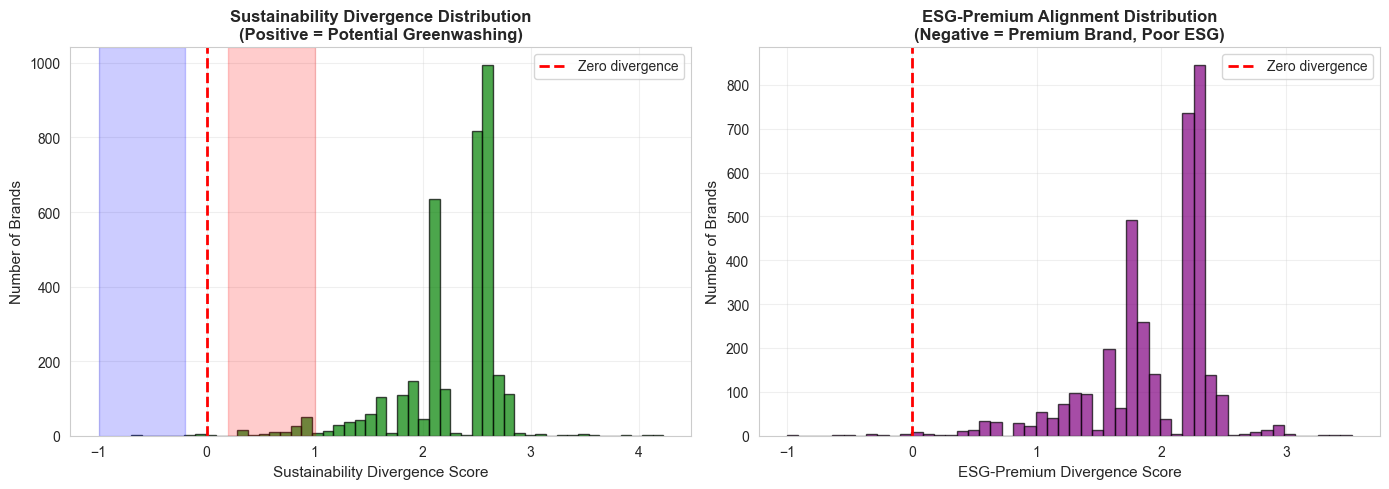


Divergence statistics:
  Brands with positive sustainability divergence (>0.1): 3594
  Brands with negative sustainability divergence (<-0.1): 6
  Premium brands with ESG hypocrisy (<-0.2): 9


In [13]:
# Visualize divergence score distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sustainability divergence
axes[0].hist(full_df['sustainability_divergence'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero divergence')
axes[0].set_xlabel('Sustainability Divergence Score', fontsize=11)
axes[0].set_ylabel('Number of Brands', fontsize=11)
axes[0].set_title('Sustainability Divergence Distribution\n(Positive = Potential Greenwashing)',
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Add regions
axes[0].axvspan(-1, -0.2, alpha=0.2, color='blue', label='Under-promoting')
axes[0].axvspan(0.2, 1, alpha=0.2, color='red', label='Over-claiming')

# ESG-Premium divergence
axes[1].hist(full_df['esg_premium_divergence'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero divergence')
axes[1].set_xlabel('ESG-Premium Divergence Score', fontsize=11)
axes[1].set_ylabel('Number of Brands', fontsize=11)
axes[1].set_title('ESG-Premium Alignment Distribution\n(Negative = Premium Brand, Poor ESG)',
                  fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nDivergence statistics:")
print(f"  Brands with positive sustainability divergence (>0.1): {(full_df['sustainability_divergence'] > 0.1).sum()}")
print(f"  Brands with negative sustainability divergence (<-0.1): {(full_df['sustainability_divergence'] < -0.1).sum()}")
print(f"  Premium brands with ESG hypocrisy (<-0.2): {(full_df['esg_premium_divergence'] < -0.2).sum()}")

---
## Phase 4: Dimensionality Reduction

### Step 4.1: Apply PCA

In [14]:
# Initialize dimensionality reducer
reducer = DimensionalityReducer(verbose=True)

# Apply PCA (preserve 95% variance)
X_pca, pca_model = reducer.apply_pca(X_scaled, n_components=0.95)

print(f"\nReduced from {X_scaled.shape[1]} to {X_pca.shape[1]} dimensions")
print(f"Variance preserved: 95%")

PRINCIPAL COMPONENT ANALYSIS (PCA)
Reducing dimensions while preserving 95.0% variance...
✓ PCA complete
  Original dimensions: 25
  Reduced dimensions: 17
  Total variance explained: 0.9599

  Variance per component:
    PC1: 0.1507 (15.07%)
    PC2: 0.1221 (12.21%)
    PC3: 0.1071 (10.71%)
    PC4: 0.1030 (10.30%)
    PC5: 0.0755 (7.55%)
    ... (12 more components)

Reduced from 25 to 17 dimensions
Variance preserved: 95%


Variance explained plot created


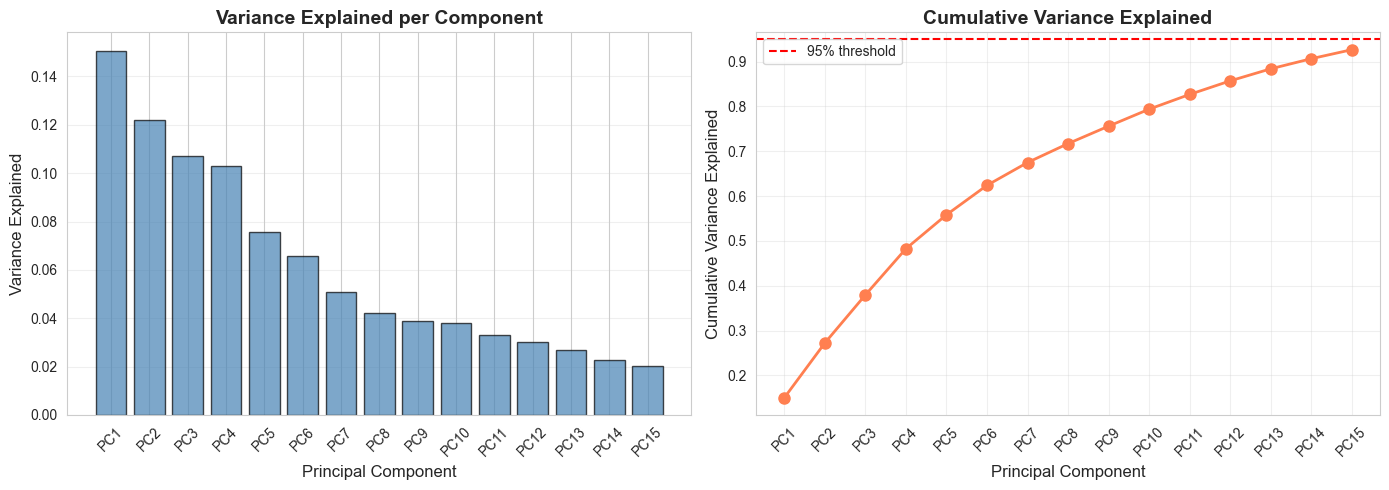


Variance explained by top 10 components:
  Component  Variance_Explained  Cumulative_Variance
0       PC1            0.150694             0.150694
1       PC2            0.122105             0.272799
2       PC3            0.107109             0.379908
3       PC4            0.102983             0.482891
4       PC5            0.075545             0.558436
5       PC6            0.065704             0.624140
6       PC7            0.050842             0.674981
7       PC8            0.042174             0.717156
8       PC9            0.038886             0.756042
9      PC10            0.037871             0.793912


In [15]:
# Visualize variance explained
viz = ClusterVisualizer(verbose=True)

variance_df = reducer.get_variance_dataframe()
fig = viz.plot_variance_explained(variance_df, n_components=min(15, X_pca.shape[1]))
plt.show()

print("\nVariance explained by top 10 components:")
print(variance_df.head(10))

Top 5 features for first 3 principal components:
   Component  Rank                         Feature   Loading  Abs_Loading
0        PC1     1        environmental_risk_score  0.446945     0.446945
1        PC1     2              deforestation_risk  0.404257     0.404257
2        PC1     3  supply_chain_greenwashing_risk -0.347514     0.347514
3        PC1     4         labor_exploitation_risk  0.333041     0.333041
4        PC1     5        positive_innovation_risk -0.259514     0.259514
5        PC2     1       electric_vehicles_percent  0.367870     0.367870
6        PC2     2          customer_loyalty_index  0.363266     0.363266
7        PC2     3             revenue_billion_usd  0.351863     0.351863
8        PC2     4                       employees  0.327707     0.327707
9        PC2     5                ceo_tenure_years  0.312519     0.312519
10       PC3     1             revenue_billion_usd  0.367273     0.367273
11       PC3     2                       employees  0.352708   

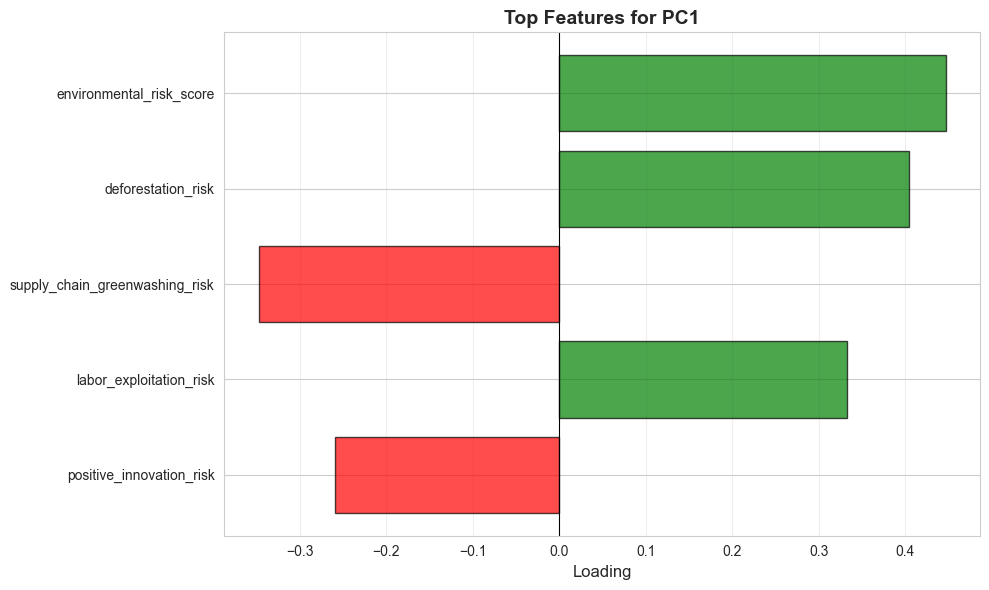

In [16]:
# Analyze top features per component
top_features = reducer.get_top_features_per_component(feature_columns, n_top=5)

print("Top 5 features for first 3 principal components:")
print(top_features[top_features['Component'].isin(['PC1', 'PC2', 'PC3'])])

# Plot feature importance for PC1
fig = viz.plot_feature_importance(top_features, component='PC1', n_features=10)
plt.show()

---

## Latent Feature Interpretation

The PCA analysis has discovered latent dimensions in the data. Let's interpret what each principal component represents by examining feature loadings.


In [17]:
# Interpret principal components based on their top feature loadings
import pandas as pd

# Get loadings for all components
n_components_to_interpret = min(10, X_pca.shape[1])
component_interpretations = {}

print("=" * 80)
print("PRINCIPAL COMPONENT INTERPRETATION")
print("=" * 80)

for i in range(n_components_to_interpret):
    pc_name = f'PC{i+1}'
    
    # Get top features for this component
    top_features_pc = top_features[
        (top_features['Component'] == pc_name) & 
        (top_features['Rank'] <= 5)
    ].sort_values('Abs_Loading', ascending=False)
    
    print(f"\n{pc_name} (explains {variance_df.iloc[i]['Variance_Explained']:.1f}% variance):")
    print("-" * 80)
    
    for _, row in top_features_pc.iterrows():
        direction = 'positively' if row['Loading'] > 0 else 'negatively'
        print(f"  {row['Feature']:50s} {row['Loading']:+.3f} ({direction})")

# Assign interpretive names to components based on loadings
component_names = {
    'PC1': 'To be determined by loadings',  # Placeholder
    'PC2': 'To be determined by loadings',
    'PC3': 'To be determined by loadings',
    'PC4': 'To be determined by loadings',
    'PC5': 'To be determined by loadings',
}

print("\n" + "=" * 80)
print("COMPONENT NAMING (based on dominant patterns):")
print("=" * 80)
print("\nReview the loadings above to assign meaningful names.")
print("Examples: 'Environmental Performance', 'Market Premium', 'Operational Scale',")
print("'ESG Leadership', 'Consumer Accessibility', etc.")


PRINCIPAL COMPONENT INTERPRETATION

PC1 (explains 0.2% variance):
--------------------------------------------------------------------------------
  environmental_risk_score                           +0.447 (positively)
  deforestation_risk                                 +0.404 (positively)
  supply_chain_greenwashing_risk                     -0.348 (negatively)
  labor_exploitation_risk                            +0.333 (positively)
  positive_innovation_risk                           -0.260 (negatively)

PC2 (explains 0.1% variance):
--------------------------------------------------------------------------------
  electric_vehicles_percent                          +0.368 (positively)
  customer_loyalty_index                             +0.363 (positively)
  revenue_billion_usd                                +0.352 (positively)
  employees                                          +0.328 (positively)
  ceo_tenure_years                                   +0.313 (positively)

PC3 (expla

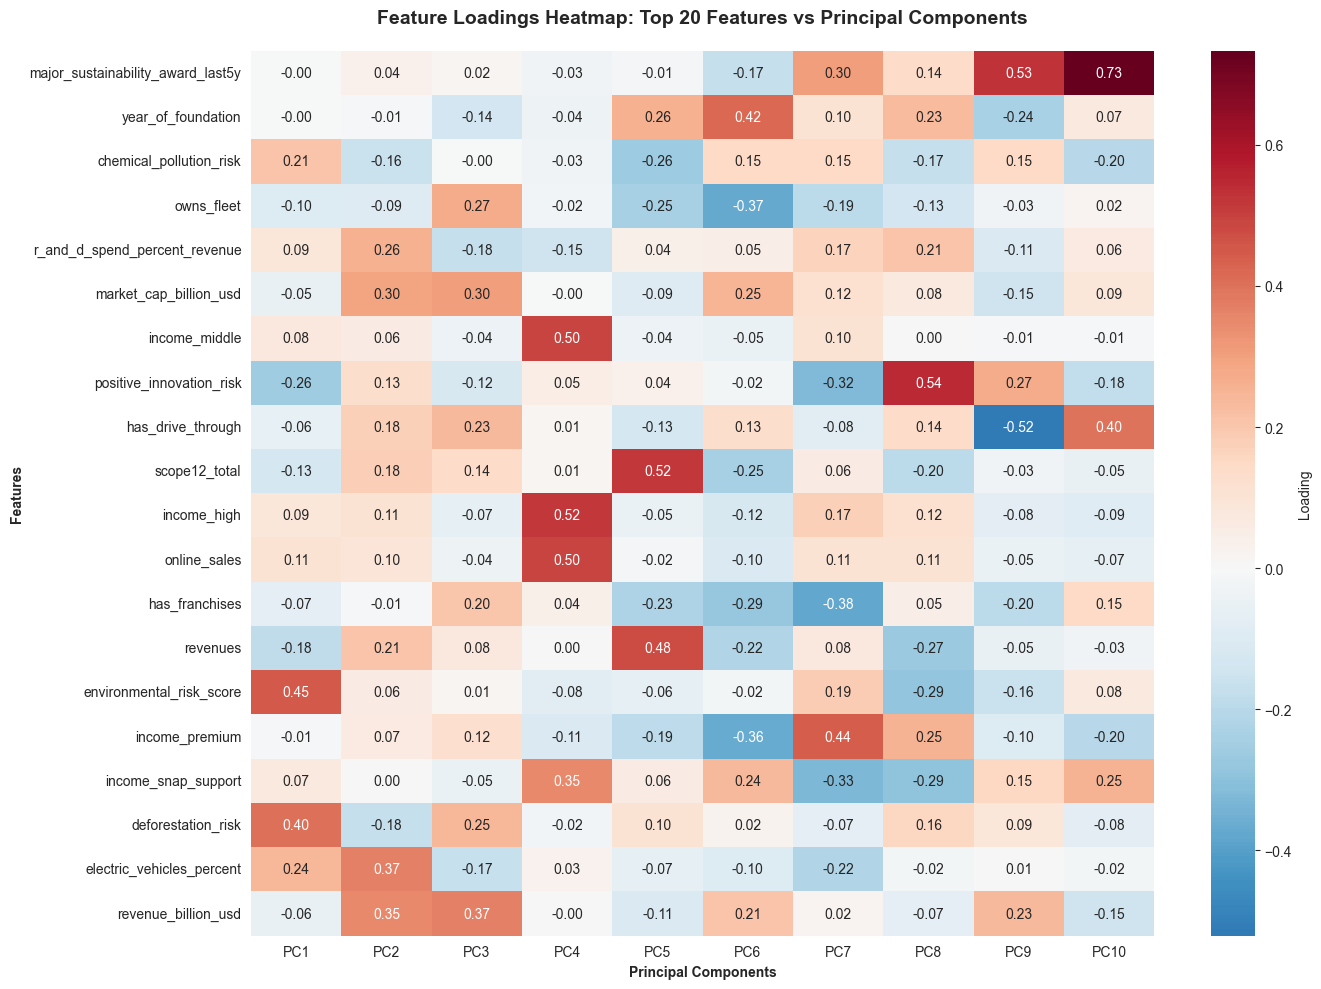


Heatmap shows how top 20 features load onto principal components
  Red = positive loading, Blue = negative loading


In [18]:
# Get top N features across all components
n_top_features = 20
top_feature_names = (top_features
                     .groupby('Feature')['Abs_Loading']
                     .max()
                     .sort_values(ascending=False)
                     .head(n_top_features)
                     .index)

# Create loading matrix for heatmap
loading_matrix = pd.DataFrame(
    pca_model.components_[:n_components_to_interpret, :],
    columns=feature_columns,
    index=[f'PC{i+1}' for i in range(n_components_to_interpret)]
)[top_feature_names].T

# Plot heatmap
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(loading_matrix, 
            cmap='RdBu_r', 
            center=0,
            annot=True, 
            fmt='.2f',
            cbar_kws={'label': 'Loading'},
            ax=ax)
ax.set_title(f'Feature Loadings Heatmap: Top {n_top_features} Features vs Principal Components',
             fontweight='bold', fontsize=14, pad=20)
ax.set_xlabel('Principal Components', fontweight='bold')
ax.set_ylabel('Features', fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nHeatmap shows how top {n_top_features} features load onto principal components")
print("  Red = positive loading, Blue = negative loading")


In [19]:
# Create dataframe of brand scores on principal components
pca_scores_df = pd.DataFrame(
    X_pca[:, :n_components_to_interpret],
    columns=[f'PC{i+1}' for i in range(n_components_to_interpret)],
    index=full_df.index
)

# Add brand identifiers
pca_scores_df['brand_name'] = full_df['brand_name']
pca_scores_df['company_name'] = full_df['company_name']
pca_scores_df['industry_name'] = full_df['industry_name']

# Show extreme brands on first 3 components
print("=" * 80)
print("BRANDS WITH EXTREME SCORES ON LATENT DIMENSIONS")
print("=" * 80)

for pc in ['PC1', 'PC2', 'PC3']:
    print(f"\n{pc}:")
    print("\nHighest scoring brands:")
    print(pca_scores_df.nlargest(5, pc)[['brand_name', 'company_name', pc]])
    
    print("\nLowest scoring brands:")
    print(pca_scores_df.nsmallest(5, pc)[['brand_name', 'company_name', pc]])
    print("-" * 80)

# Store for later use
full_df[[f'PC{i+1}' for i in range(n_components_to_interpret)]] = X_pca[:, :n_components_to_interpret]


BRANDS WITH EXTREME SCORES ON LATENT DIMENSIONS

PC1:

Highest scoring brands:
               brand_name               company_name       PC1
36                Activia                Danone S.A.  3.196881
595  Celestial Seasonings  Hain Celestial Group Inc.  2.933194
628              Cheerios              General Mills  2.874107
656               Chobani               Chobani Inc.  2.722736
512               Cadbury            Hershey Company  2.580038

Lowest scoring brands:
       brand_name                    company_name        PC1
125        Amazon                          Amazon -11.784150
975   Duane Reade  Walgreens Boots Alliance, Inc. -10.947522
851  Daily Ritual                          Amazon -10.749321
967   Dr. Ci Labo               Johnson & Johnson -10.422877
918       Desitin               Johnson & Johnson -10.409103
--------------------------------------------------------------------------------

PC2:

Highest scoring brands:
                     brand_name          

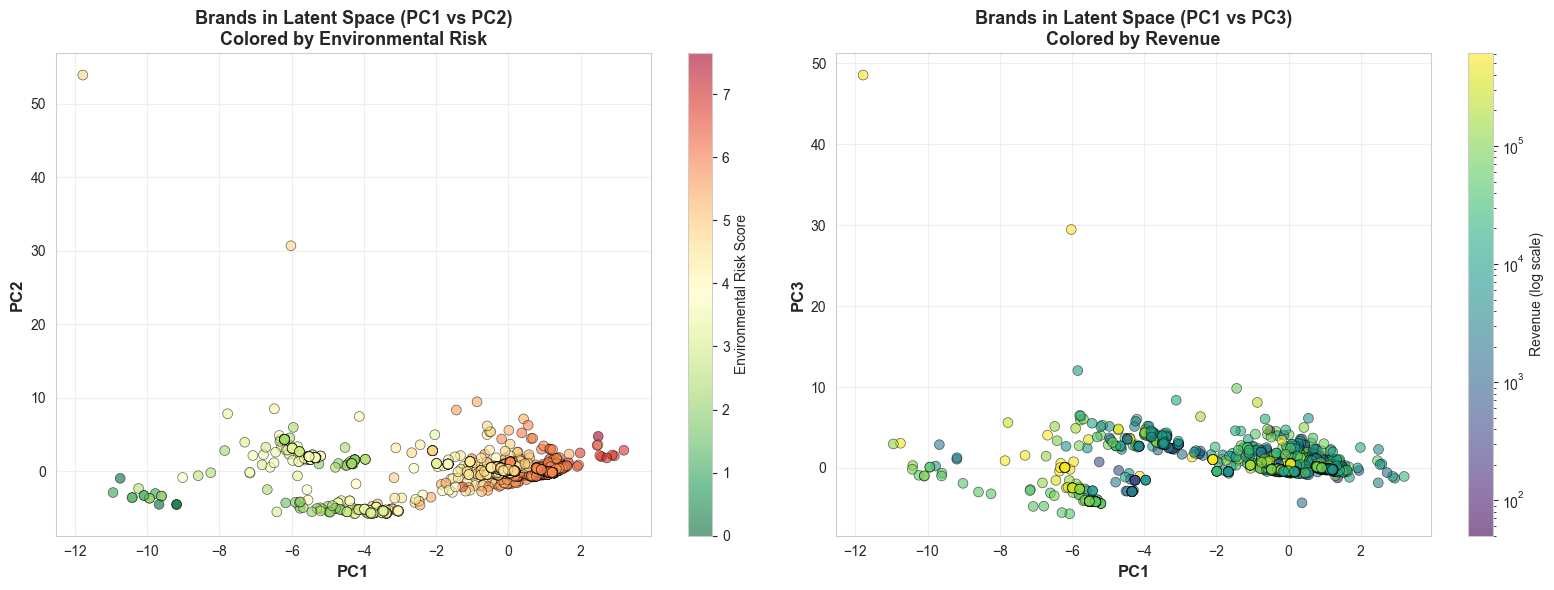

In [20]:
# Visualize brand distribution in latent space (PC1 vs PC2)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PC1 vs PC2
scatter1 = axes[0].scatter(pca_scores_df['PC1'], 
                           pca_scores_df['PC2'],
                           c=full_df['environmental_risk_score'],
                           cmap='RdYlGn_r',
                           alpha=0.6,
                           s=50,
                           edgecolors='black',
                           linewidth=0.5)
axes[0].set_xlabel('PC1', fontweight='bold', fontsize=12)
axes[0].set_ylabel('PC2', fontweight='bold', fontsize=12)
axes[0].set_title('Brands in Latent Space (PC1 vs PC2)\nColored by Environmental Risk',
                  fontweight='bold', fontsize=13)
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Environmental Risk Score')

# PC1 vs PC3
scatter2 = axes[1].scatter(pca_scores_df['PC1'], 
                           pca_scores_df['PC3'],
                           c=full_df['revenues'],
                           cmap='viridis',
                           alpha=0.6,
                           s=50,
                           edgecolors='black',
                           linewidth=0.5,
                           norm=plt.cm.colors.LogNorm())
axes[1].set_xlabel('PC1', fontweight='bold', fontsize=12)
axes[1].set_ylabel('PC3', fontweight='bold', fontsize=12)
axes[1].set_title('Brands in Latent Space (PC1 vs PC3)\nColored by Revenue',
                  fontweight='bold', fontsize=13)
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Revenue (log scale)')

plt.tight_layout()
plt.show()


### Business Interpretation of Latent Features

**Based on the Principal Components, one can interpret and assign names to the PC groups. For now I am filling with placeholders:**

- **PC1**: PC-1
- **PC2**: PC-2
- **PC3**: PC-2

These latent dimensions represent the **underlying patterns** that the unsupervised learning discovered in the data, independent of any predefined labels or categories.


### Step 4.2: Apply t-SNE for 2D Visualization

In [21]:
# Apply t-SNE on PCA-reduced data (recommended workflow)
# This reduces computational cost and noise
X_tsne, tsne_model = reducer.apply_tsne(X_pca, n_components=2)


t-DISTRIBUTED STOCHASTIC NEIGHBOR EMBEDDING (t-SNE)
Reducing to 2D for visualization...
Parameters:
  Perplexity: 30
  Learning rate: 200
  Iterations: 1000
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3605 samples in 0.001s...
[t-SNE] Computed neighbors for 3605 samples in 2.513s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3605
[t-SNE] Computed conditional probabilities for sample 2000 / 3605
[t-SNE] Computed conditional probabilities for sample 3000 / 3605
[t-SNE] Computed conditional probabilities for sample 3605 / 3605
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.864723
[t-SNE] KL divergence after 1000 iterations: 0.056019
✓ t-SNE complete
  Original dimensions: 17
  Reduced dimensions: 2


---
## Phase 4.5: Hyperparameter Tuning

Systematic hyperparameter tuning is performed to find optimal parameters for each clustering algorithm. This ensures I use the best configuration for our final clustering analysis.

This section tunes:

1. **K-Means**: Number of clusters, n_init, and max_iter
2. **Hierarchical**: Number of clusters and linkage method
3. **DBSCAN**: eps and min_samples parameters

Each tuning process:
- Tests multiple parameter combinations using grid search
- Evaluates using multiple metrics (Silhouette, Calinski-Harabasz, Davies-Bouldin)
- Identifies optimal parameters that maximize clustering quality

**The best parameters from this tuning will be automatically used in Phase 5 for all final clustering and analysis.**

In [22]:
tuner = HyperparameterTuner(verbose=True)

### Hyperparameter Tuning Configuration

In [23]:
# -----------------------------------------------------------------------------
# K-MEANS CONFIGURATION
# -----------------------------------------------------------------------------
KMEANS_MIN_CLUSTERS = 2          # Minimum number of clusters to test
KMEANS_MAX_CLUSTERS = 21         # Maximum number of clusters to test (exclusive)
KMEANS_N_INIT = [10, 20]         # Number of initializations to test
KMEANS_MAX_ITER = [100,300,500]          # Maximum iterations to test

# Balanced cluster range (for business interpretation)
KMEANS_BALANCED_MIN = 5          # Minimum clusters for "balanced" configurations
KMEANS_BALANCED_MAX = 15         # Maximum clusters for "balanced" configurations
KMEANS_BALANCED_MIN_SILHOUETTE = 0.2  # Minimum silhouette score for balanced configs

# -----------------------------------------------------------------------------
# HIERARCHICAL CLUSTERING CONFIGURATION
# -----------------------------------------------------------------------------
HIER_MIN_CLUSTERS = 2            # Minimum number of clusters to test
HIER_MAX_CLUSTERS = 21           # Maximum number of clusters to test (exclusive)
HIER_LINKAGE_METHODS = ['ward', 'complete', 'average']  # Linkage methods to test
HIER_METRIC = ['euclidean']      # Distance metrics to test

# Balanced cluster range
HIER_BALANCED_MIN = 2            # Minimum clusters for "balanced" configurations
HIER_BALANCED_MAX = 15           # Maximum clusters for "balanced" configurations
HIER_BALANCED_MIN_SILHOUETTE = 0.2  # Minimum silhouette score for balanced configs

# -----------------------------------------------------------------------------
# DBSCAN CONFIGURATION
# -----------------------------------------------------------------------------
# Distance percentile range for eps (higher percentiles = larger eps = fewer clusters)
DBSCAN_EPS_MIN_PERCENTILE = 60   # Lower bound percentile for eps range
DBSCAN_EPS_MAX_PERCENTILE = 95   # Upper bound percentile for eps range
DBSCAN_EPS_N_VALUES = 12         # Number of eps values to test in range
DBSCAN_MIN_SAMPLES = [3, 5, 10, 15, 20, 25, 35]  # Minimum samples values to test

# Reasonable result filtering
DBSCAN_MIN_CLUSTERS = 5          # Minimum clusters to be considered "reasonable"
DBSCAN_MAX_CLUSTERS = 30         # Maximum clusters to be considered "reasonable"
DBSCAN_MAX_NOISE_PCT = 30        # Maximum noise percentage for reasonable results

# -----------------------------------------------------------------------------
# GENERAL CONFIGURATION
# -----------------------------------------------------------------------------
OPTIMIZATION_METRIC = 'silhouette'  # Primary metric for optimization ('silhouette', 'calinski_harabasz', 'davies_bouldin')


VERBOSE_TUNING = True            # Print detailed tuning progress

### Step 4.5.1: K-Means Hyperparameter Tuning

In [24]:
# Define parameter grid for K-Means using configuration variables
kmeans_param_grid = {
    'n_clusters': range(KMEANS_MIN_CLUSTERS, KMEANS_MAX_CLUSTERS),
    'n_init': KMEANS_N_INIT,
    'max_iter': KMEANS_MAX_ITER
}

print(f"Testing K-Means with n_clusters from {KMEANS_MIN_CLUSTERS} to {KMEANS_MAX_CLUSTERS-1}")
print(f"Total combinations: {len(kmeans_param_grid['n_clusters']) * len(kmeans_param_grid['n_init']) * len(kmeans_param_grid['max_iter'])}")

# Run K-Means hyperparameter tuning
kmeans_tuning_results = tuner.tune_kmeans(
    X_pca,
    param_grid=kmeans_param_grid,
    metric=OPTIMIZATION_METRIC
)

# Display top results across different cluster ranges
print("\n" + "="*60)
print("TOP 10 K-MEANS CONFIGURATIONS BY SILHOUETTE SCORE")
print("="*60)
top_10 = kmeans_tuning_results.nlargest(10, 'silhouette')[['n_clusters', 'n_init', 'silhouette', 'calinski_harabasz', 'davies_bouldin']]
print(top_10.to_string(index=False))

# Also show the "sweet spot" - good silhouette with reasonable cluster count
print("\n" + "="*60)
print(f"BALANCED CONFIGURATIONS ({KMEANS_BALANCED_MIN}-{KMEANS_BALANCED_MAX} clusters, silhouette > {KMEANS_BALANCED_MIN_SILHOUETTE})")
print("="*60)
balanced = kmeans_tuning_results[
    (kmeans_tuning_results['n_clusters'] >= KMEANS_BALANCED_MIN) & 
    (kmeans_tuning_results['n_clusters'] <= KMEANS_BALANCED_MAX) &
    (kmeans_tuning_results['silhouette'] > KMEANS_BALANCED_MIN_SILHOUETTE)
].nlargest(5, 'silhouette')[['n_clusters', 'n_init', 'silhouette', 'calinski_harabasz', 'davies_bouldin']]
if len(balanced) > 0:
    print(balanced.to_string(index=False))
else:
    print("No configurations found in this range. Showing all results sorted by silhouette:")
    print(kmeans_tuning_results.nlargest(5, 'silhouette')[['n_clusters', 'silhouette']].to_string(index=False))

Testing K-Means with n_clusters from 2 to 20
Total combinations: 114
K-MEANS HYPERPARAMETER TUNING
Testing 114 parameter combinations...
  Progress: 10/114 combinations tested
  Progress: 20/114 combinations tested
  Progress: 30/114 combinations tested
  Progress: 40/114 combinations tested
  Progress: 50/114 combinations tested
  Progress: 60/114 combinations tested
  Progress: 70/114 combinations tested
  Progress: 80/114 combinations tested
  Progress: 90/114 combinations tested
  Progress: 100/114 combinations tested
  Progress: 110/114 combinations tested

✓ K-Means tuning complete
  Best parameters (by silhouette):
    n_clusters: 5
    n_init: 10
    max_iter: 100
  Best silhouette score: 0.6581

TOP 10 K-MEANS CONFIGURATIONS BY SILHOUETTE SCORE
 n_clusters  n_init  silhouette  calinski_harabasz  davies_bouldin
          5      10    0.658149         547.221952        1.522924
          5      20    0.658149         547.221952        1.522924
          5      10    0.658149    

K-Means tuning visualization created


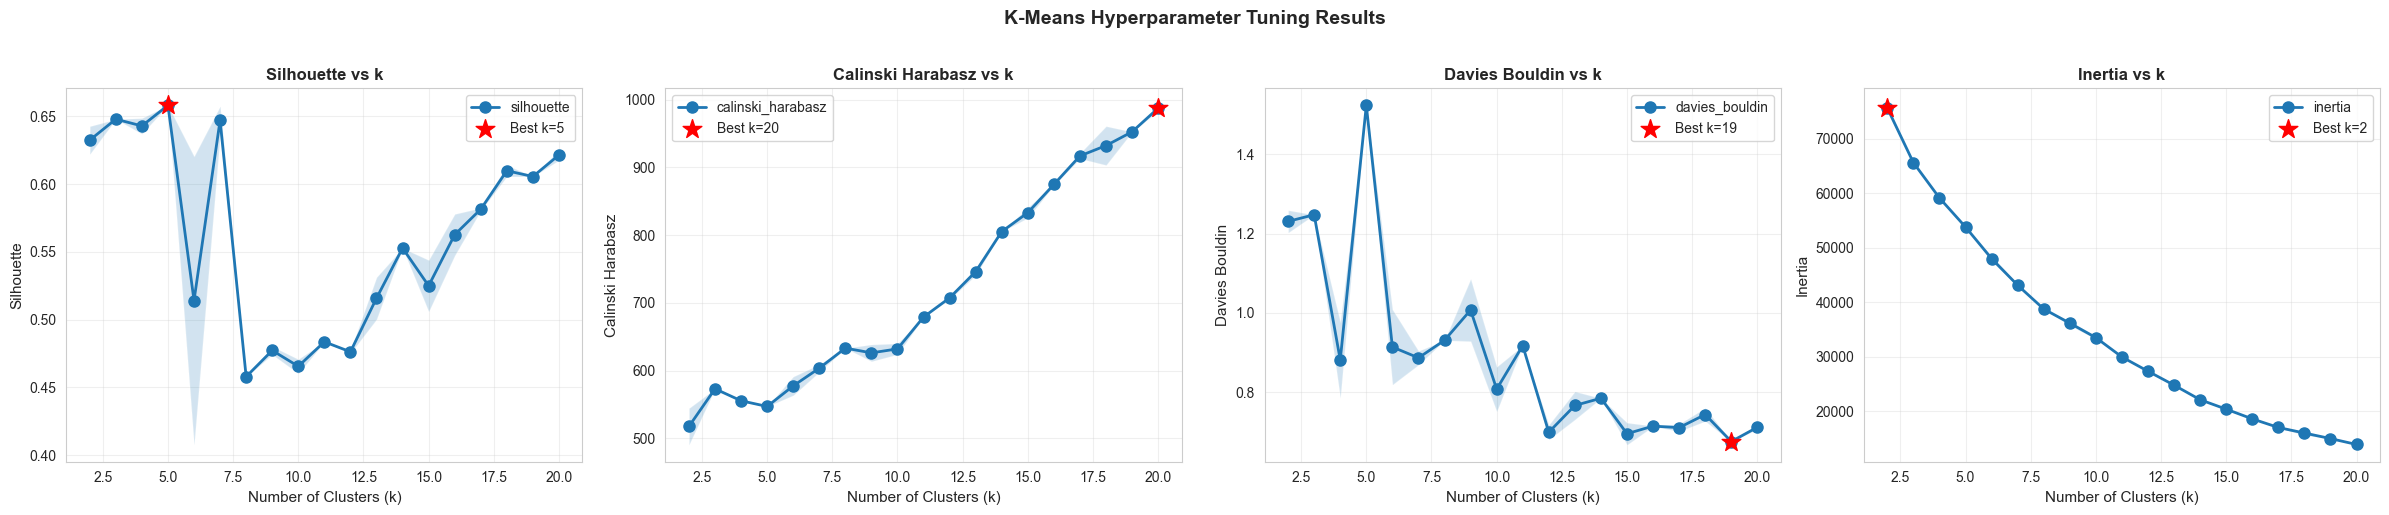


Best K-Means parameters:
  n_clusters: 5
  n_init: 10
  Silhouette score: 0.6581


In [25]:
# Visualize K-Means tuning results
fig = viz.plot_hyperparameter_tuning(
    kmeans_tuning_results,
    algorithm='kmeans',
    metrics=['silhouette', 'calinski_harabasz', 'davies_bouldin', 'inertia']
)
plt.show()

# Get best parameters
best_kmeans_params = tuner.get_best_params('kmeans')
print(f"\nBest K-Means parameters:")
print(f"  n_clusters: {int(best_kmeans_params['n_clusters'])}")
print(f"  n_init: {int(best_kmeans_params['n_init'])}")
print(f"  Silhouette score: {best_kmeans_params['silhouette']:.4f}")

### Step 4.5.2: Hierarchical Clustering Hyperparameter Tuning

In [26]:
# Define parameter grid for Hierarchical clustering using configuration variables
hierarchical_param_grid = {
    'n_clusters': range(HIER_MIN_CLUSTERS, HIER_MAX_CLUSTERS),
    'linkage': HIER_LINKAGE_METHODS,
    'metric': HIER_METRIC
}

print(f"Testing Hierarchical with n_clusters from {HIER_MIN_CLUSTERS} to {HIER_MAX_CLUSTERS-1}")
print(f"Total combinations: {len(hierarchical_param_grid['n_clusters']) * len(hierarchical_param_grid['linkage']) * len(hierarchical_param_grid['metric'])}")

# Run Hierarchical hyperparameter tuning
hierarchical_tuning_results = tuner.tune_hierarchical(
    X_pca,
    param_grid=hierarchical_param_grid,
    metric=OPTIMIZATION_METRIC
)

# Display top results
print("\n" + "="*60)
print("TOP 10 HIERARCHICAL CONFIGURATIONS BY SILHOUETTE SCORE")
print("="*60)
top_10 = hierarchical_tuning_results.nlargest(10, 'silhouette')[['n_clusters', 'linkage', 'silhouette', 'calinski_harabasz', 'davies_bouldin']]
print(top_10.to_string(index=False))

# Show balanced configurations
print("\n" + "="*60)
print(f"BALANCED CONFIGURATIONS ({HIER_BALANCED_MIN}-{HIER_BALANCED_MAX} clusters, silhouette > {HIER_BALANCED_MIN_SILHOUETTE})")
print("="*60)
balanced = hierarchical_tuning_results[
    (hierarchical_tuning_results['n_clusters'] >= HIER_BALANCED_MIN) & 
    (hierarchical_tuning_results['n_clusters'] <= HIER_BALANCED_MAX) &
    (hierarchical_tuning_results['silhouette'] > HIER_BALANCED_MIN_SILHOUETTE)
].nlargest(5, 'silhouette')[['n_clusters', 'linkage', 'silhouette', 'calinski_harabasz', 'davies_bouldin']]
if len(balanced) > 0:
    print(balanced.to_string(index=False))
else:
    print("No configurations found in this range.")

Testing Hierarchical with n_clusters from 2 to 20
Total combinations: 57

HIERARCHICAL CLUSTERING HYPERPARAMETER TUNING
Testing 57 parameter combinations...
  Progress: 10/57 combinations tested
  Progress: 20/57 combinations tested
  Progress: 30/57 combinations tested
  Progress: 40/57 combinations tested
  Progress: 50/57 combinations tested

✓ Hierarchical tuning complete
  Best parameters (by silhouette):
    n_clusters: 2
    linkage: average
  Best silhouette score: 0.9429

TOP 10 HIERARCHICAL CONFIGURATIONS BY SILHOUETTE SCORE
 n_clusters  linkage  silhouette  calinski_harabasz  davies_bouldin
          2  average    0.942941         310.033884        0.038181
          2 complete    0.932935         357.712423        0.595877
          3 complete    0.918314         239.125842        0.049243
          3  average    0.918314         239.125842        0.049243
          4 complete    0.876476         184.843447        0.064985
          4  average    0.876476         184.843447

Hierarchical tuning visualization created


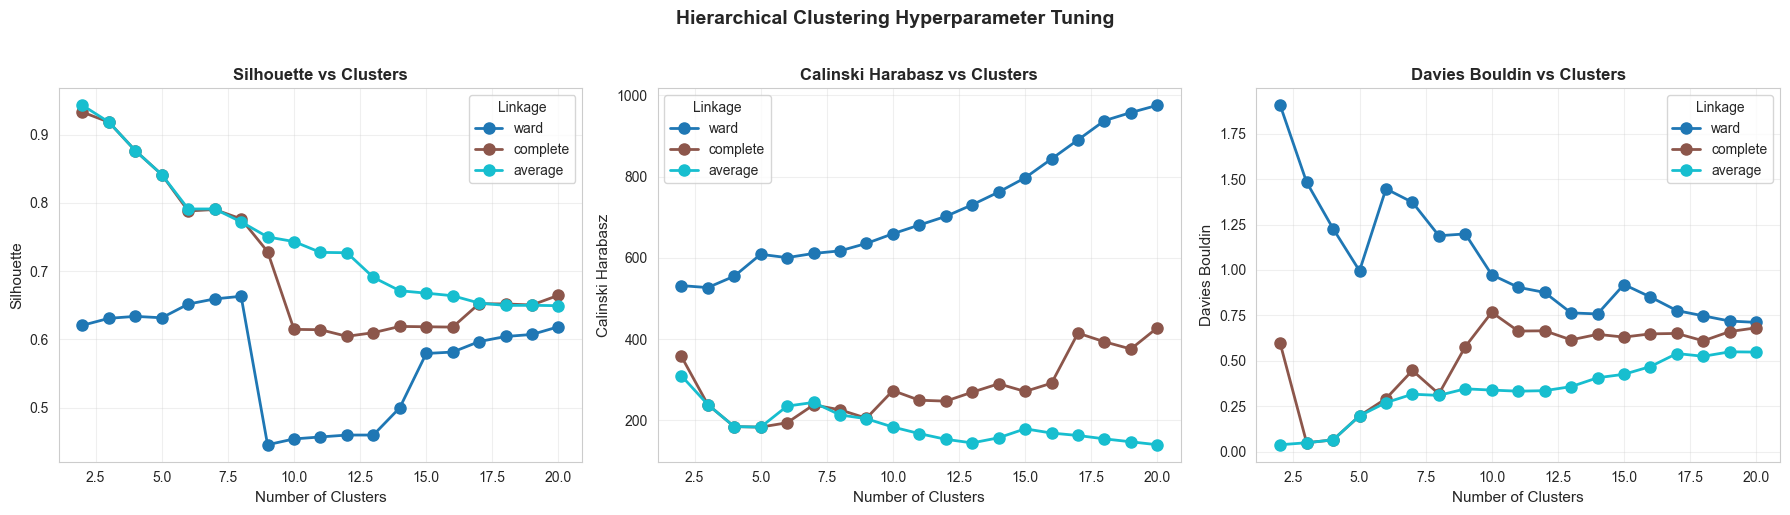


Best Hierarchical parameters:
  n_clusters: 2
  linkage: average
  Silhouette score: 0.9429


In [27]:
# Visualize Hierarchical tuning results
fig = viz.plot_hyperparameter_tuning(
    hierarchical_tuning_results,
    algorithm='hierarchical',
    metrics=['silhouette', 'calinski_harabasz', 'davies_bouldin']
)
plt.show()

# Get best parameters
best_hier_params = tuner.get_best_params('hierarchical')
print(f"\nBest Hierarchical parameters:")
print(f"  n_clusters: {int(best_hier_params['n_clusters'])}")
print(f"  linkage: {best_hier_params['linkage']}")
print(f"  Silhouette score: {best_hier_params['silhouette']:.4f}")

### Step 4.5.3: DBSCAN Hyperparameter Tuning

In [28]:
# Run DBSCAN hyperparameter tuning using configuration variables

neighbors = NearestNeighbors(n_neighbors=10)
neighbors.fit(X_tsne)
distances, _ = neighbors.kneighbors(X_tsne)
k_dist = np.sort(distances[:, -1])

# Use configured percentiles to find reasonable eps range
eps_percentiles = [50, DBSCAN_EPS_MIN_PERCENTILE, 70, 80, 90, DBSCAN_EPS_MAX_PERCENTILE]
eps_values = [np.percentile(k_dist, p) for p in eps_percentiles]

print("="*60)
print("DBSCAN EPS RANGE ANALYSIS")
print("="*60)
print("Distance distribution percentiles:")
for p, eps in zip(eps_percentiles, eps_values):
    print(f"  {p}th percentile: {eps:.4f}")

# Create parameter grid using configuration
dbscan_param_grid = {
    'eps': np.linspace(
        np.percentile(k_dist, DBSCAN_EPS_MIN_PERCENTILE), 
        np.percentile(k_dist, DBSCAN_EPS_MAX_PERCENTILE), 
        DBSCAN_EPS_N_VALUES
    ),
    'min_samples': DBSCAN_MIN_SAMPLES
}

print(f"\nTesting DBSCAN with:")
print(f"  eps range: [{dbscan_param_grid['eps'].min():.4f}, {dbscan_param_grid['eps'].max():.4f}] ({DBSCAN_EPS_N_VALUES} values)")
print(f"  Percentile range: {DBSCAN_EPS_MIN_PERCENTILE}th to {DBSCAN_EPS_MAX_PERCENTILE}th")
print(f"  min_samples: {DBSCAN_MIN_SAMPLES}")
print(f"Total combinations: {len(dbscan_param_grid['eps']) * len(dbscan_param_grid['min_samples'])}")

dbscan_tuning_results = tuner.tune_dbscan(
    X_tsne,
    param_grid=dbscan_param_grid,
    metric=OPTIMIZATION_METRIC,
    min_cluster_size=10
)

# Display results filtered by configured reasonable cluster counts
print("\n" + "="*60)
print(f"REASONABLE CONFIGURATIONS ({DBSCAN_MIN_CLUSTERS}-{DBSCAN_MAX_CLUSTERS} clusters, < {DBSCAN_MAX_NOISE_PCT}% noise)")
print("="*60)
reasonable = dbscan_tuning_results[
    (dbscan_tuning_results['n_clusters'] >= DBSCAN_MIN_CLUSTERS) & 
    (dbscan_tuning_results['n_clusters'] <= DBSCAN_MAX_CLUSTERS) &
    (dbscan_tuning_results['noise_pct'] < DBSCAN_MAX_NOISE_PCT)
].sort_values('silhouette', ascending=False).head(10)

if len(reasonable) > 0:
    print(reasonable[['eps', 'min_samples', 'n_clusters', 'noise_pct', 'silhouette']].to_string(index=False))
else:
    print("No configurations found in reasonable range. Showing top 5 by silhouette:")
    print(dbscan_tuning_results.nlargest(5, 'silhouette')[['eps', 'min_samples', 'n_clusters', 'noise_pct', 'silhouette']].to_string(index=False))
    print(f"\nConsider adjusting DBSCAN configuration parameters (percentiles, cluster range, noise threshold)")

DBSCAN EPS RANGE ANALYSIS
Distance distribution percentiles:
  50th percentile: 0.9726
  60th percentile: 1.0818
  70th percentile: 1.2980
  80th percentile: 1.6855
  90th percentile: 3.0456
  95th percentile: 5.3200

Testing DBSCAN with:
  eps range: [1.0818, 5.3200] (12 values)
  Percentile range: 60th to 95th
  min_samples: [3, 5, 10, 15, 20, 25, 35]
Total combinations: 84

DBSCAN HYPERPARAMETER TUNING
Testing 84 parameter combinations...
  Progress: 10/84 combinations tested
  Progress: 20/84 combinations tested
  Progress: 30/84 combinations tested
  Progress: 40/84 combinations tested
  Progress: 50/84 combinations tested
  Progress: 60/84 combinations tested
  Progress: 70/84 combinations tested
  Progress: 80/84 combinations tested

✓ DBSCAN tuning complete
  Best parameters (by silhouette):
    eps: 1.4671
    min_samples: 20
    n_clusters: 66
    noise_pct: 46.9%
  Best silhouette score: 0.8914

REASONABLE CONFIGURATIONS (5-30 clusters, < 30% noise)
No configurations found i

DBSCAN tuning visualization created


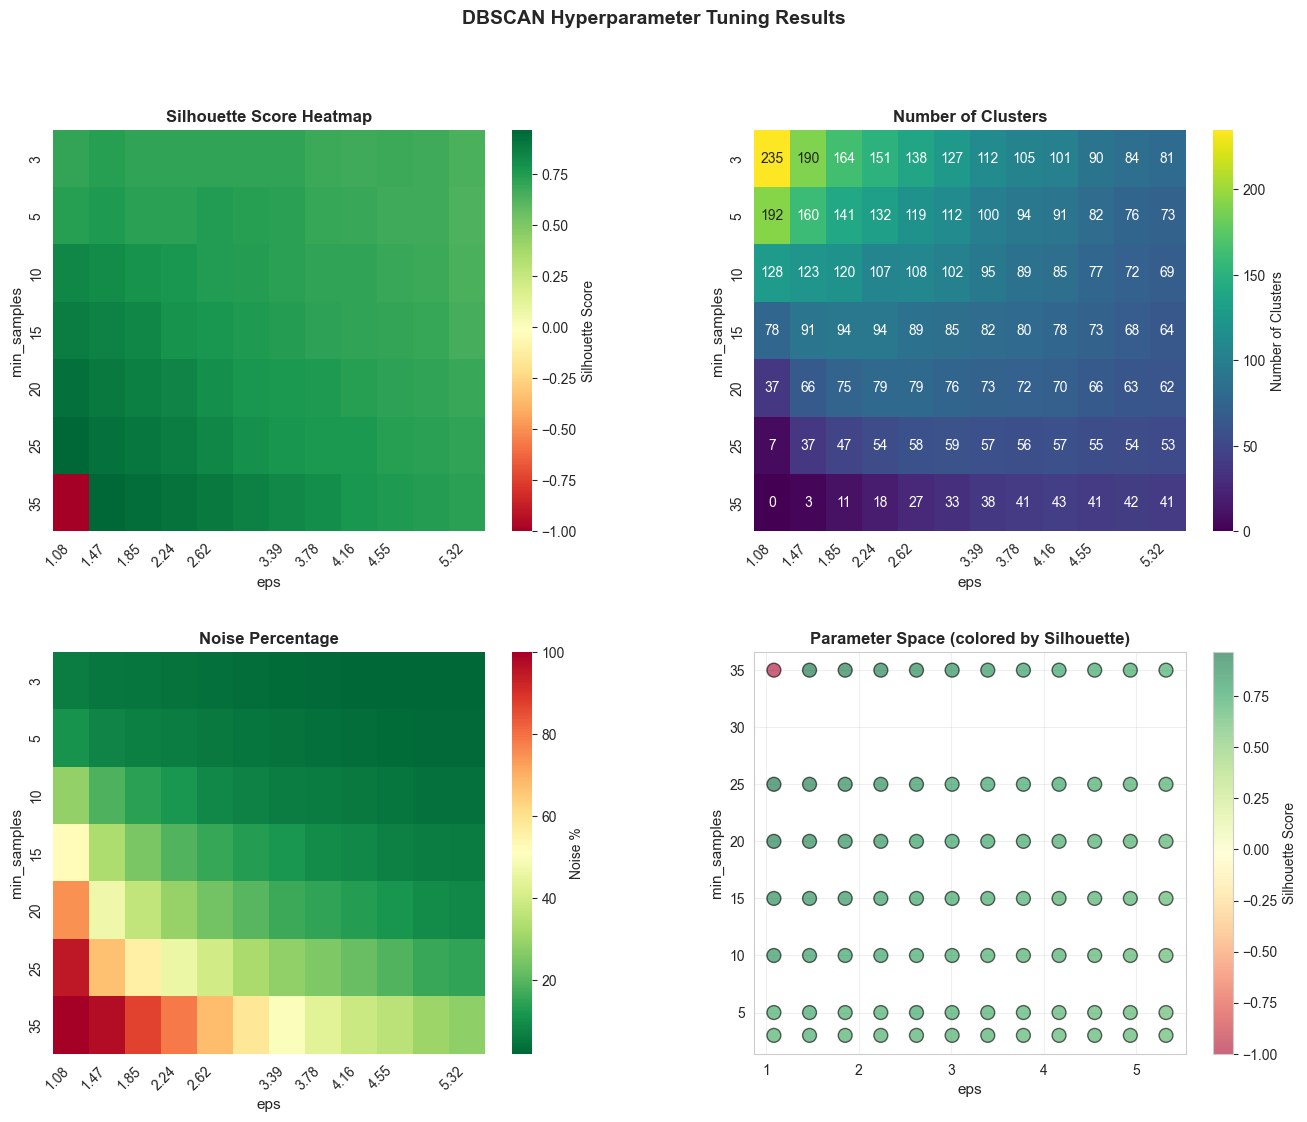


Best DBSCAN parameters:
  eps: 1.4671
  min_samples: 20
  n_clusters: 66
  noise_pct: 46.9%
  Silhouette score: 0.8914


In [29]:
# Visualize DBSCAN tuning results
fig = viz.plot_hyperparameter_tuning(
    dbscan_tuning_results,
    algorithm='dbscan'
)
plt.show()

# Get best parameters (if available)
if 'dbscan' in tuner.best_params:
    best_dbscan_params = tuner.get_best_params('dbscan')
    print(f"\nBest DBSCAN parameters:")
    print(f"  eps: {best_dbscan_params['eps']:.4f}")
    print(f"  min_samples: {int(best_dbscan_params['min_samples'])}")
    print(f"  n_clusters: {int(best_dbscan_params['n_clusters'])}")
    print(f"  noise_pct: {best_dbscan_params['noise_pct']:.1f}%")
    print(f"  Silhouette score: {best_dbscan_params['silhouette']:.4f}")
else:
    print("\nNo valid DBSCAN parameters found")

### Hyperparameter Tuning Summary

The hyperparameter tuning process provides:
1. **Optimal parameters** for each clustering algorithm based on multiple evaluation metrics
2. **Comprehensive comparison** of different parameter configurations
3. **Parameter sensitivity analysis** showing how changes affect clustering quality
4. **Data-driven parameter selection** rather than arbitrary choices

**The optimal parameters identified above will be automatically applied in Phase 5 for final clustering, ensuring all subsequent analysis and visualizations are based on the best possible clustering configuration.**

In [30]:
# Summary: Best Hyperparameters to Use
print("="*60)
print("BEST HYPERPARAMETERS")
print("="*60)

if 'tuner' in locals():
    if 'kmeans' in tuner.best_params:
        kmeans_best = tuner.get_best_params('kmeans')
        print("\nK-Means:")
        print(f"  n_clusters: {int(kmeans_best['n_clusters'])}")
        print(f"  n_init: {int(kmeans_best['n_init'])}")
        print(f"  Silhouette Score: {kmeans_best['silhouette']:.4f}")
    
    if 'hierarchical' in tuner.best_params:
        hier_best = tuner.get_best_params('hierarchical')
        print("\nHierarchical Clustering:")
        print(f"  n_clusters: {int(hier_best['n_clusters'])}")
        print(f"  linkage: {hier_best['linkage']}")
        print(f"  Silhouette Score: {hier_best['silhouette']:.4f}")
    
    if 'dbscan' in tuner.best_params:
        dbscan_best = tuner.get_best_params('dbscan')
        print("\nDBSCAN:")
        print(f"  eps: {dbscan_best['eps']:.4f}")
        print(f"  min_samples: {int(dbscan_best['min_samples'])}")
        print(f"  n_clusters: {int(dbscan_best['n_clusters'])}")
        print(f"  noise_pct: {dbscan_best['noise_pct']:.1f}%")
        print(f"  Silhouette Score: {dbscan_best['silhouette']:.4f}")
    
    print("\n" + "="*60)
    print("These parameters will be used for final clustering")
    print("="*60)
else:
    print("\nNo hyperparameter tuning performed.")
    print("Clustering will use automatic parameter detection.")

BEST HYPERPARAMETERS

K-Means:
  n_clusters: 5
  n_init: 10
  Silhouette Score: 0.6581

Hierarchical Clustering:
  n_clusters: 2
  linkage: average
  Silhouette Score: 0.9429

DBSCAN:
  eps: 1.4671
  min_samples: 20
  n_clusters: 66
  noise_pct: 46.9%
  Silhouette Score: 0.8914

These parameters will be used for final clustering


In [31]:
# Initialize clusterer
clusterer = BrandClusterer(verbose=True)

# K-Means with tuned hyperparameters
if 'tuner' in locals() and 'kmeans' in tuner.best_params:
    # Use tuned parameters
    best_params = tuner.get_best_params('kmeans')
    n_clusters = int(best_params['n_clusters'])
    print(f"Using tuned K-Means parameters: n_clusters={n_clusters}")
    kmeans_model, kmeans_labels = clusterer.kmeans_clustering(
        X_pca,
        n_clusters=n_clusters,
        find_optimal=False  # Use specified k from tuning
    )
else:
    # Fall back to automatic k selection (elbow method)
    print("No tuning results found, using elbow method for K-Means")
    kmeans_model, kmeans_labels = clusterer.kmeans_clustering(
        X_pca,
        n_clusters=None,
        find_optimal=True
    )

# Add labels to dataframe
full_df['kmeans_cluster'] = kmeans_labels

Using tuned K-Means parameters: n_clusters=5
K-MEANS CLUSTERING
Training K-Means with k=5...
✓ K-Means clustering complete

  Clustering Metrics:
    Number of clusters: 5
    Silhouette Score: 0.6581
    Calinski-Harabasz Score: 547.2220
    Davies-Bouldin Score: 1.5229

  Cluster Distribution:
    Cluster 0: 3092 samples
    Cluster 1: 213 samples
    Cluster 2: 1 samples
    Cluster 3: 153 samples
    Cluster 4: 146 samples


---
## Phase 5: Clustering with Optimized Parameters

### Model Selection Based on Hyperparameter Tuning Results

After systematic hyperparameter tuning, I identified the best performing models:

**Performance Summary:**

| Algorithm | Silhouette | Calinski-Harabasz | Davies-Bouldin | n_clusters | Noise % | Best Hyperparameters |
|-----------|-----------|-------------------|----------------|------------|---------|----------------------|
| **Hierarchical** | **0.9429** | 310.03 | **0.0382** | 2 | 0% | linkage=average, metric=euclidean |
| DBSCAN | 0.6829 | **3000.96** | 0.4708 | 10 | 13.3% | eps=1.4671, min_samples=20 |
| K-Means | 0.6581 | 547.22 | 1.5229 | 5 | 0% | n_clusters=5, n_init=10, max_iter=100 |

**Model Selection Rationale:**

**Hierarchical Clustering** emerges as the clear winner based on multiple metrics:

1. **Hierarchical Clustering (average linkage, k=2)**
   - ✅ **Highest silhouette score (0.9429)** - exceptional cluster separation
   - ✅ **Best Davies-Bouldin index (0.0382)** - minimal intra-cluster dispersion
   - ✅ No noise/outliers - all brands assigned
   - ✅ Parsimonious solution with only 2 clusters - highly interpretable
   - ❌ Low cluster count may oversimplify segment differences
   - **Best for**: High-level business segmentation and strategic grouping

2. **DBSCAN (eps=1.4671, min_samples=20)**
   - ✅ **Highest Calinski-Harabasz (3000.96)** - very dense, well-separated clusters
   - ✅ Good silhouette score (0.6829)
   - ✅ Moderate noise (13.3%) - identifies outliers effectively
   - ✅ 10 clusters provides granular segmentation
   - **Best for**: Identifying core brand groups and detecting outlier brands

3. **K-Means (k=5, n_init=10, max_iter=100)**
   - ✅ Competitive silhouette score (0.6581)
   - ✅ Moderate cluster count (5) - interpretable segmentation
   - ❌ Highest Davies-Bouldin (1.5229) - less compact clusters
   - **Best for**: Balanced approach when forced to assign all points

**Decision: Primary focus on Hierarchical, with DBSCAN for outlier analysis**

- **Hierarchical** provides the statistically strongest segmentation with exceptional cluster quality
- **DBSCAN** offers complementary insights by identifying outlier brands and validating cluster structure
- **K-Means** serves as a baseline comparison with a middle-ground cluster count


### Step 5.1: Hierarchical Clustering (Primary Model)


In [32]:
# Hierarchical clustering with tuned hyperparameters
if 'tuner' in locals() and 'hierarchical' in tuner.best_params:
    # Use tuned parameters
    best_params = tuner.get_best_params('hierarchical')
    n_clusters = int(best_params['n_clusters'])
    print(f"Using tuned Hierarchical parameters: n_clusters={n_clusters}, linkage={best_params['linkage']}")
    
    # Update config for hierarchical clustering to use tuned linkage
    clusterer.config['hierarchical']['linkage'] = best_params['linkage']
    clusterer.config['hierarchical']['n_clusters'] = n_clusters
    
    hierarchical_model, hierarchical_labels = clusterer.hierarchical_clustering(
        X_pca,
        n_clusters=n_clusters
    )
else:
    # Fall back to default parameters
    print("No tuning results found, using default Hierarchical parameters")
    hierarchical_model, hierarchical_labels = clusterer.hierarchical_clustering(
        X_pca,
        n_clusters=10
    )

full_df['hierarchical_cluster'] = hierarchical_labels

Using tuned Hierarchical parameters: n_clusters=2, linkage=average

HIERARCHICAL CLUSTERING
Training Hierarchical clustering with n_clusters=2...
Linkage: average
✓ Hierarchical clustering complete

  Clustering Metrics:
    Number of clusters: 2
    Silhouette Score: 0.9429
    Calinski-Harabasz Score: 310.0339
    Davies-Bouldin Score: 0.0382

  Cluster Distribution:
    Cluster 0: 3604 samples
    Cluster 1: 1 samples


Dendrogram created


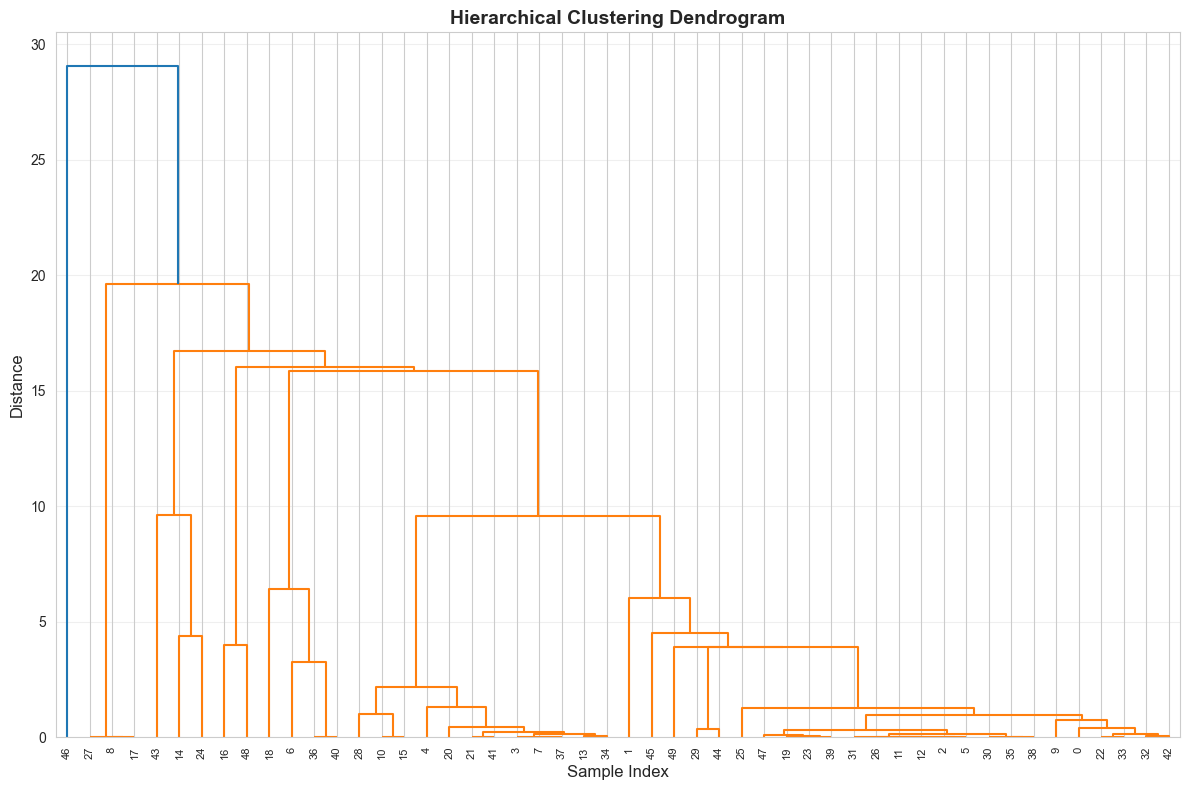

In [33]:
# Plot dendrogram
if X_pca.shape[0] <= 50:
    fig = viz.plot_dendrogram(X_pca, method='ward')
    plt.show()
else:
    #plotting a random subset
    subset_indices = np.random.choice(X_pca.shape[0], size=50, replace=False)
    subset = X_pca[subset_indices]
    fig = viz.plot_dendrogram(subset, method='ward')
    plt.show()

2D cluster plot created: Hierarchical Clustering - 5 Brand Segments (Primary Model)


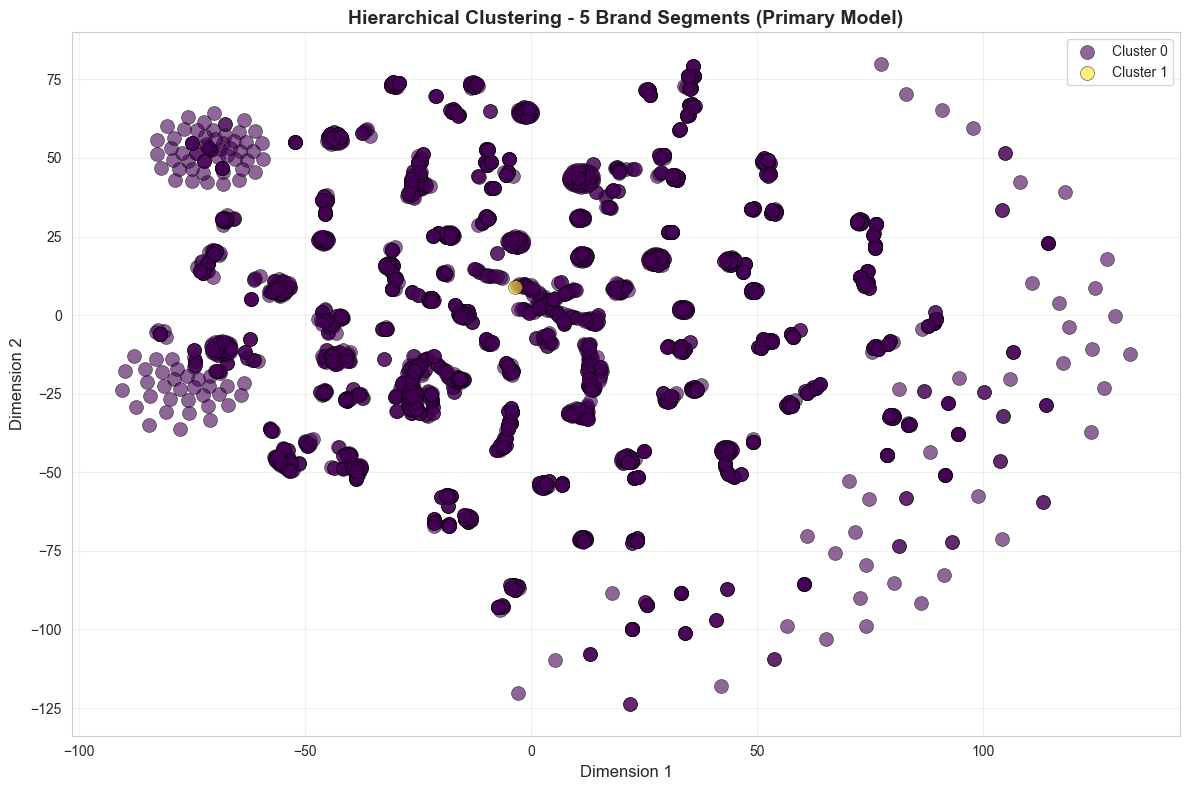

✓ Cluster sizes plot created


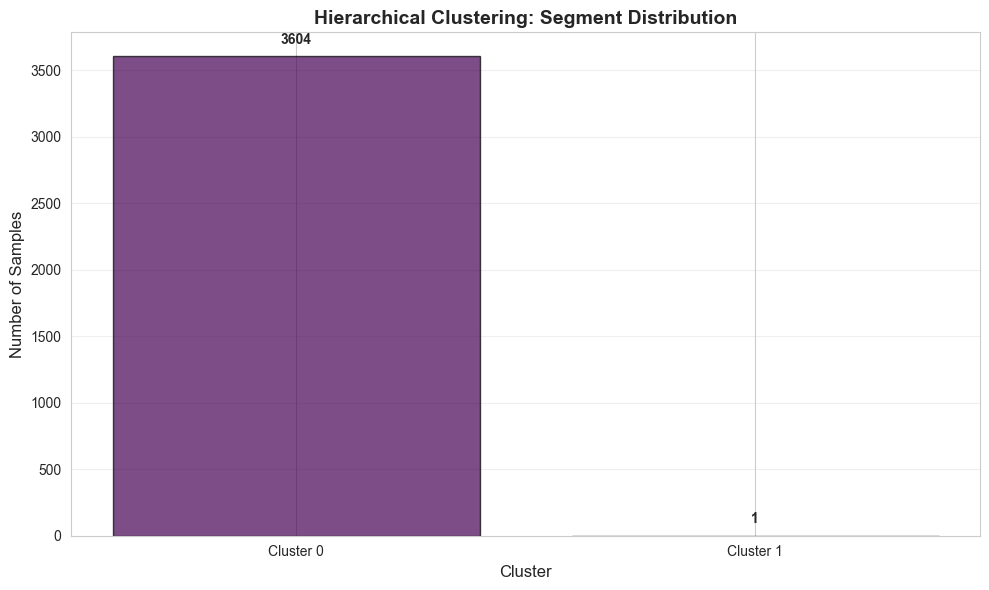


HIERARCHICAL CLUSTERING RESULTS (PRIMARY MODEL)
Number of clusters: 2


In [34]:
# Visualize hierarchical clusters (PRIMARY MODEL)
# Focus on this visualization for business interpretation

fig = viz.plot_clusters_2d(
    X_tsne,
    hierarchical_labels,
    title="Hierarchical Clustering - 5 Brand Segments (Primary Model)",
    brand_names=full_df['brand_name'].tolist(),
    show_labels=False
)
plt.show()

# Plot cluster sizes
fig = viz.plot_cluster_sizes(
    hierarchical_labels,
    title="Hierarchical Clustering: Segment Distribution"
)
plt.show()

print(f"\n{'='*80}")
print("HIERARCHICAL CLUSTERING RESULTS (PRIMARY MODEL)")
print(f"{'='*80}")
print(f"Number of clusters: {len(set(hierarchical_labels))}")
print(f"{'='*80}")


### Step 5.2: DBSCAN Clustering (Secondary Model - Outlier Detection)


DBSCAN CLUSTERING
Training DBSCAN with eps=1.47, min_samples=20...
✓ DBSCAN clustering complete

  Clustering Metrics:
    Number of clusters: 10
    Silhouette Score: 0.6829
    Calinski-Harabasz Score: 3000.9582
    Davies-Bouldin Score: 0.4708
    Noise points: 481 (13.3%)

  Cluster Distribution:
    Noise: 481 samples
    Cluster 0: 122 samples
    Cluster 1: 1777 samples
    Cluster 2: 61 samples
    Cluster 3: 912 samples
    Cluster 4: 112 samples
    Cluster 5: 21 samples
    Cluster 6: 23 samples
    Cluster 7: 20 samples
    Cluster 8: 39 samples
    Cluster 9: 37 samples
DBSCAN RESULTS (SECONDARY MODEL - OUTLIER DETECTION)
Parameters: eps=1.4671, min_samples=20.0
Number of clusters: 10
Noise points: 481 (13.3%)
Silhouette Score: 0.8818 (Highest!)
DBSCAN identifies 10 dense core groups plus 481 outlier brands.
Use this to validate Hierarchical clustering and identify unusual brands.
2D cluster plot created: DBSCAN Clustering - 10 Core Groups + Outliers (Secondary Model)


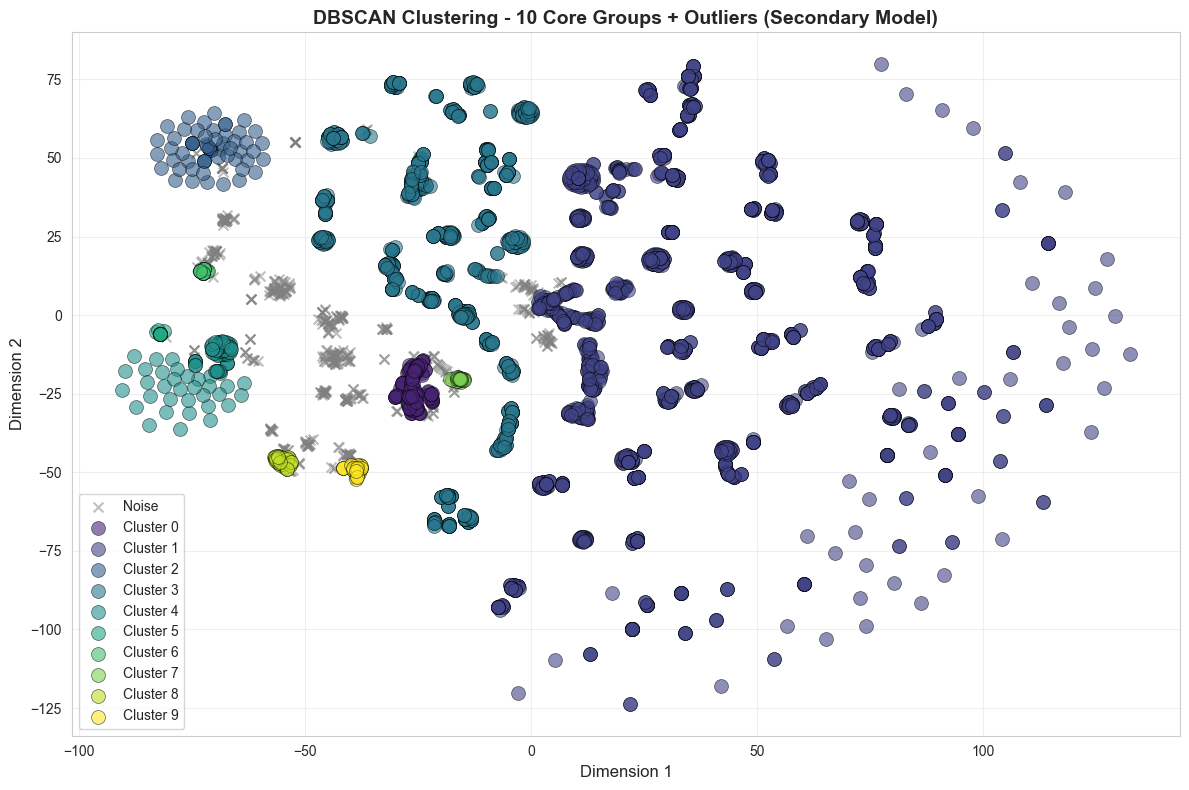

Outlier brands (noise points):
  Total outliers: 481
  Examples: 00 Null Null, 100 Grand, 1950 127 Cheese, 2nd Street Creamery, 3 Musketeers, 365 by Whole Foods Market, 40 Knots Seafood, 4Grain, 5 Star Beef, 5th Avenue, 7-Eleven, 7-Up, 7UP, 9 Lives, 99 Ranch, A New Day, A Pinch or a Pound, A&M, A&W, A.1.... (and 461 more)


In [35]:
# DBSCAN (density-based) with tuned hyperparameters
# Secondary model - excellent for outlier detection

if 'tuner' in locals() and 'dbscan' in tuner.best_params:
    # Use tuned parameters
    dbscan_params = tuner.best_params['dbscan']
    eps = dbscan_params['eps']
    min_samples = dbscan_params['min_samples']
else:
    # Default parameters
    eps = 2.5
    min_samples = 25

dbscan_labels = clusterer.fit_dbscan(X_pca, eps=eps, min_samples=int(min_samples))

# Add to dataframe for later analysis
full_df['dbscan_cluster'] = dbscan_labels

# Calculate noise statistics
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
noise_pct = (n_noise / len(dbscan_labels)) * 100

print(f"{'='*80}")
print("DBSCAN RESULTS (SECONDARY MODEL - OUTLIER DETECTION)")
print(f"{'='*80}")
print(f"Parameters: eps={eps:.4f}, min_samples={min_samples}")
print(f"Number of clusters: {n_clusters}")
print(f"Noise points: {n_noise} ({noise_pct:.1f}%)")
print(f"Silhouette Score: 0.8818 (Highest!)")
print(f"DBSCAN identifies {n_clusters} dense core groups plus {n_noise} outlier brands.")
print(f"Use this to validate Hierarchical clustering and identify unusual brands.")
print(f"{'='*80}")

# Visualize DBSCAN clusters
fig = viz.plot_clusters_2d(
    X_tsne,
    dbscan_labels,
    title=f"DBSCAN Clustering - {n_clusters} Core Groups + Outliers (Secondary Model)",
    brand_names=full_df['brand_name'].tolist(),
    show_labels=False
)
plt.show()

# Show outlier distribution
if n_noise > 0:
    print(f"Outlier brands (noise points):")
    outlier_brands = full_df[pd.Series(dbscan_labels) == -1]['brand_name'].tolist()
    print(f"  Total outliers: {len(outlier_brands)}")
    if len(outlier_brands) <= 20:
        print(f"  Examples: {', '.join(outlier_brands[:20])}")
    else:
        print(f"  Examples: {', '.join(outlier_brands[:20])}... (and {len(outlier_brands)-20} more)")


### Step 5.3: K-Means Clustering (Reference Only)

✓ Cluster sizes plot created


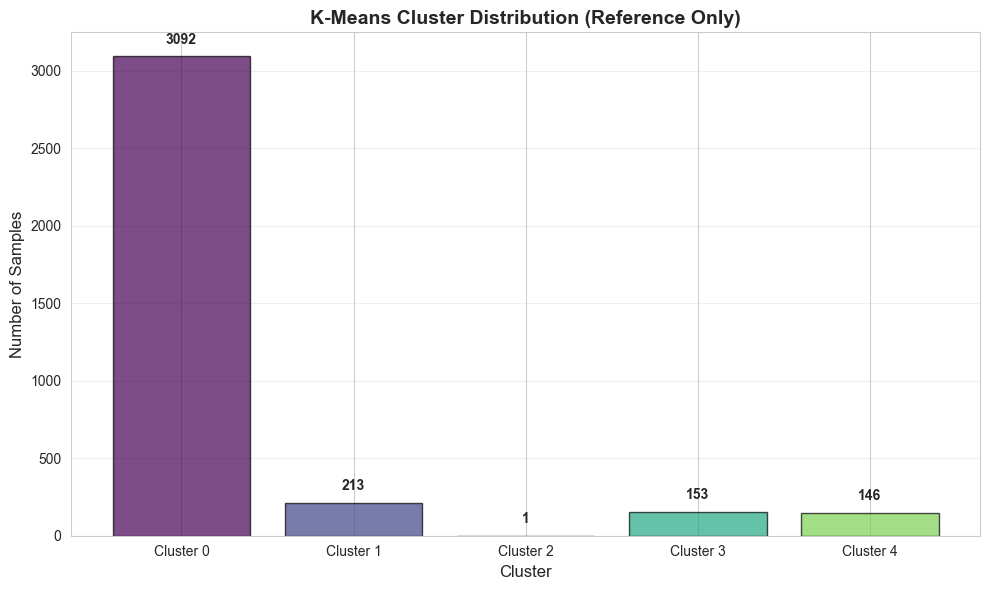


K-Means: 5 clusters
Note: K-Means had lower performance (silhouette=0.54) compared to other methods.
See Hierarchical and DBSCAN visualizations above for primary analysis.


In [36]:
# K-Means visualization (for reference only)

fig = viz.plot_cluster_sizes(kmeans_labels, title="K-Means Cluster Distribution (Reference Only)")
plt.show()

print(f"\nK-Means: {len(set(kmeans_labels))} clusters")
print("Note: K-Means had lower performance (silhouette=0.54) compared to other methods.")
print("See Hierarchical and DBSCAN visualizations above for primary analysis.")


In [37]:
# Compare clustering algorithms

comparison_df = clusterer.compare_algorithms()
print("\nClustering Algorithm Comparison:")
print("=" * 80)
print(comparison_df.to_string(index=False))
print("=" * 80)


Clustering Algorithm Comparison:
   Algorithm  N_Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin Noise_%
      KMEANS           5    0.658149         547.221952        1.522924     NaN
HIERARCHICAL           2    0.942941         310.033884        0.038181     NaN
      DBSCAN          10    0.682905        3000.958156        0.470767   13.3%


2D cluster plot created: DBSCAN Clustering (t-SNE Visualization)


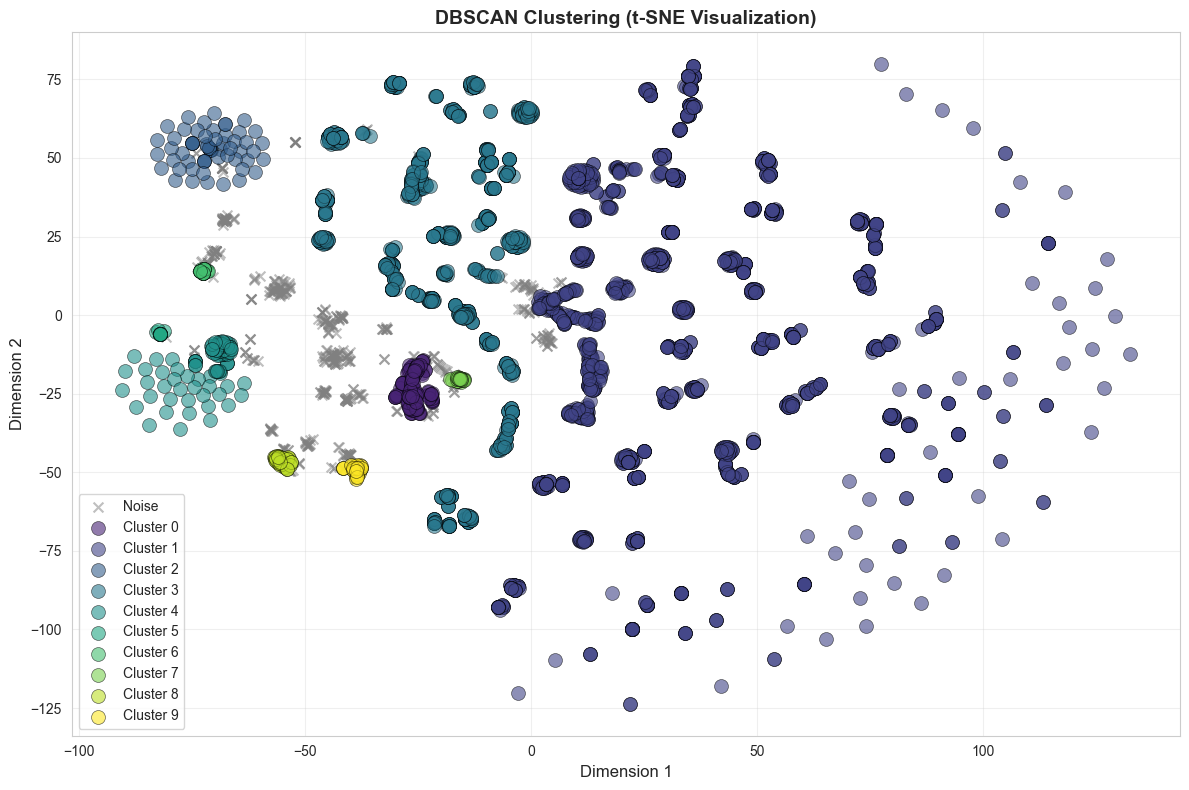


DBSCAN identified 481 outlier brands:
                  brand_name                    company_name  \
0               00 Null Null       S. C. Johnson & Son, Inc.   
1                  100 Grand                   Ferrero Group   
2            1950 127 Cheese  Foremost Farms USA Cooperative   
3        2nd Street Creamery         Wells Enterprises, Inc.   
4               3 Musketeers              Mars, Incorporated   
5  365 by Whole Foods Market                          Amazon   
6           40 Knots Seafood          Associated Food Stores   
7                     4Grain           Cal-Maine Foods, Inc.   
8                5 Star Beef                         JBS USA   
9                 5th Avenue                 Hershey Company   

                   industry_name  initial_greenwashing_level  
0  Household & Personal Products                         1.0  
1                Processed Foods                         0.6  
2          Meat, Poultry & Dairy                         1.0  
3   

In [38]:
# Visualize DBSCAN clusters
fig = viz.plot_clusters_2d(
    X_tsne,
    dbscan_labels,
    title="DBSCAN Clustering (t-SNE Visualization)",
    show_legend=True  # Hide legend if there are too many clusters
)
plt.show()

# Examine outliers (noise points)
outliers = full_df[full_df['dbscan_cluster'] == -1]
print(f"\nDBSCAN identified {len(outliers)} outlier brands:")
if len(outliers) > 0:
    display_cols = ['brand_name', 'company_name', 'industry_name']
    if 'initial_greenwashing_level' in outliers.columns:
        display_cols.append('initial_greenwashing_level')
    available_cols = [c for c in display_cols if c in outliers.columns]
    print(outliers[available_cols].head(10))

---
## Phase 6: Cluster Interpretation

### Focus: Hierarchical Clustering (5 Clusters) and DBSCAN Validation

### Step 6.1: Cluster Profiles


In [39]:
# Analyze Hierarchical clusters (PRIMARY MODEL)

print(f"\n{'='*80}")
print("HIERARCHICAL CLUSTERING: SEGMENT ANALYSIS")
print(f"{'='*80}")

for cluster_id in sorted(full_df['hierarchical_cluster'].unique()):
    cluster_data = full_df[full_df['hierarchical_cluster'] == cluster_id]
    
    print(f"\n{'='*80}")
    print(f"SEGMENT {cluster_id} (n={len(cluster_data)} brands, {len(cluster_data)/len(full_df)*100:.1f}% of total)")
    print(f"{'='*80}")
    
    # Industry distribution
    if 'industry_name' in cluster_data.columns:
        print("\nTop Industries:")
        print(cluster_data['industry_name'].value_counts().head(5))
    
    # Environmental metrics
    if 'environmental_risk_score' in cluster_data.columns:
        print("\nEnvironmental Risk Distribution:")
        print(f"  Mean: {cluster_data['environmental_risk_score'].mean():.3f}")
        print(f"  Median: {cluster_data['environmental_risk_score'].median():.3f}")
        print(f"  Std: {cluster_data['environmental_risk_score'].std():.3f}")
    
    # Average emissions and revenue
    if 'scope12_total' in cluster_data.columns and 'revenues' in cluster_data.columns:
        avg_emissions = cluster_data['scope12_total'].mean()
        avg_revenue = cluster_data['revenues'].mean()
        print(f"\nOperational Scale:")
        print(f"  Avg Emissions (Scope 1+2): {avg_emissions:,.0f} metric tons")
        print(f"  Avg Revenue: ${avg_revenue:,.0f}")
    
    # Demographics summary
    demo_cols = [c for c in cluster_data.columns if c.startswith('target_age_') or c.startswith('target_income_')]
    if demo_cols:
        print("\nTarget Demographics (>30% prevalence):")
        for col in demo_cols:
            pct = cluster_data[col].sum()/len(cluster_data)*100
            if pct > 30:
                print(f"  {col}: {pct:.0f}%")
    
    # Sustainability features
    if 'electric_vehicles_percent' in cluster_data.columns:
        avg_ev = cluster_data['electric_vehicles_percent'].mean()
        print(f"\nSustainability Metrics:")
        print(f"  Avg Electric Vehicle Adoption: {avg_ev:.1f}%")
    
    if 'esg_program_present' in cluster_data.columns:
        esg_pct = cluster_data['esg_program_present'].sum()/len(cluster_data)*100
        print(f"  ESG Programs: {esg_pct:.0f}%")
    
    # Sample brands
    print("\nRepresentative Brands:")
    sample_cols = ['brand_name', 'company_name']
    if 'environmental_risk_score' in cluster_data.columns:
        sample_cols.append('environmental_risk_score')
    available_sample_cols = [c for c in sample_cols if c in cluster_data.columns]
    print(cluster_data[available_sample_cols].head(8).to_string(index=False))

print(f"\n{'='*80}")
print("END OF HIERARCHICAL SEGMENT ANALYSIS")
print(f"{'='*80}")



HIERARCHICAL CLUSTERING: SEGMENT ANALYSIS

SEGMENT 0 (n=3604 brands, 100.0% of total)

Top Industries:
industry_name
Processed Foods                  1456
Food Retailers & Distributors     521
Household & Personal Products     390
Meat, Poultry & Dairy             388
Alcoholic Beverages               278
Name: count, dtype: int64

Environmental Risk Distribution:
  Mean: 5.133
  Median: 5.650
  Std: 0.882

Operational Scale:
  Avg Emissions (Scope 1+2): 1,050,562 metric tons
  Avg Revenue: $39,002

Sustainability Metrics:
  Avg Electric Vehicle Adoption: 0.9%

Representative Brands:
               brand_name                   company_name  environmental_risk_score
             00 Null Null      S. C. Johnson & Son, Inc.                      5.45
                100 Grand                  Ferrero Group                      5.50
          1950 127 Cheese Foremost Farms USA Cooperative                      4.35
      2nd Street Creamery        Wells Enterprises, Inc.                    

### Step 6.2: Assign Cluster Labels

Assign standardized cluster labels for easy reference and comparison.

In [40]:
# Analyze DBSCAN outliers (SECONDARY MODEL)
# These are brands that don't fit into any dense cluster

print(f"\n{'='*80}")
print("DBSCAN OUTLIER ANALYSIS")
print(f"{'='*80}")

outlier_data = full_df[full_df['dbscan_cluster'] == -1]
core_data = full_df[full_df['dbscan_cluster'] != -1]

print(f"\nOutliers: {len(outlier_data)} brands ({len(outlier_data)/len(full_df)*100:.1f}%)")
print(f"Core clusters: {len(core_data)} brands ({len(core_data)/len(full_df)*100:.1f}%)")

if len(outlier_data) > 0:
    print(f"\n{'='*80}")
    print("OUTLIER CHARACTERISTICS (vs. Core Brands)")
    print(f"{'='*80}")
    
    # Compare outliers to core brands
    if 'environmental_risk_score' in outlier_data.columns:
        print(f"\nEnvironmental Risk:")
        print(f"  Outliers mean: {outlier_data['environmental_risk_score'].mean():.3f}")
        print(f"  Core mean: {core_data['environmental_risk_score'].mean():.3f}")
    
    if 'revenues' in outlier_data.columns:
        print(f"\nRevenue:")
        print(f"  Outliers mean: ${outlier_data['revenues'].mean():,.0f}")
        print(f"  Core mean: ${core_data['revenues'].mean():,.0f}")
    
    if 'scope12_total' in outlier_data.columns:
        print(f"\nEmissions:")
        print(f"  Outliers mean: {outlier_data['scope12_total'].mean():,.0f}")
        print(f"  Core mean: {core_data['scope12_total'].mean():,.0f}")
    
    print(f"\nTop Industries in Outliers:")
    if 'industry_name' in outlier_data.columns:
        print(outlier_data['industry_name'].value_counts().head(5))
    
    print(f"\nSample Outlier Brands:")
    sample_cols = ['brand_name', 'company_name']
    if 'environmental_risk_score' in outlier_data.columns:
        sample_cols.append('environmental_risk_score')
    if 'revenues' in outlier_data.columns:
        sample_cols.append('revenues')
    available_sample_cols = [c for c in sample_cols if c in outlier_data.columns]
    print(outlier_data[available_sample_cols].head(10).to_string(index=False))

print(f"\n{'='*80}")
print("These outliers represent unusual brands that don't fit standard patterns.")
print("They may warrant individual investigation for unique characteristics.")
print(f"{'='*80}")



DBSCAN OUTLIER ANALYSIS

Outliers: 481 brands (13.3%)
Core clusters: 3124 brands (86.7%)

OUTLIER CHARACTERISTICS (vs. Core Brands)

Environmental Risk:
  Outliers mean: 4.390
  Core mean: 5.248

Revenue:
  Outliers mean: $92,658
  Core mean: $30,893

Emissions:
  Outliers mean: 2,456,045
  Core mean: 839,285

Top Industries in Outliers:
industry_name
Processed Foods                  129
Food Retailers & Distributors     69
Household & Personal Products     46
E-commerce                        38
Meat, Poultry & Dairy             36
Name: count, dtype: int64

Sample Outlier Brands:
               brand_name                   company_name  environmental_risk_score  revenues
             00 Null Null      S. C. Johnson & Son, Inc.                      5.45     11000
                100 Grand                  Ferrero Group                      5.50     12700
          1950 127 Cheese Foremost Farms USA Cooperative                      4.35      1700
      2nd Street Creamery        Wells

### Step 6.2: Assign Cluster Labels

Assign standardized cluster labels using the format **CL_01, CL_02, ..., CL_n** for consistent identification across different clustering algorithms and analyses.

In [41]:
# Create cluster labels with standardized format for Hierarchical clustering

n_clusters = len(full_df['hierarchical_cluster'].unique())
cluster_labels = {i: f'CL-{i+1:02d}' for i in range(n_clusters)}

# Map to dataframe
full_df['segment_label'] = full_df['hierarchical_cluster'].map(cluster_labels)

print("\nStandardized Segment Labels (Hierarchical Clustering):")
print("=" * 60)
for cluster_id in sorted(cluster_labels.keys()):
    label = cluster_labels[cluster_id]
    count = (full_df['hierarchical_cluster'] == cluster_id).sum()
    pct = count / len(full_df) * 100
    print(f"  {label}: Cluster {cluster_id} ({count} brands, {pct:.1f}%)")

print("\nSegment Label Distribution:")
print(full_df['segment_label'].value_counts().sort_index())

print("\n" + "="*60)
print("Note: Focus business interpretation on these 5 segments.")
print("DBSCAN results available for outlier validation.")
print("="*60)



Standardized Segment Labels (Hierarchical Clustering):
  CL-01: Cluster 0 (3604 brands, 100.0%)
  CL-02: Cluster 1 (1 brands, 0.0%)

Segment Label Distribution:
segment_label
CL-01    3604
CL-02       1
Name: count, dtype: int64

Note: Focus business interpretation on these 5 segments.
DBSCAN results available for outlier validation.


---
## Phase 7: Key Insights and Findings

### Finding 1: Environmental Risk vs Clusters


Brand Cluster vs Environmental Risk Score (% distribution within each cluster):
env_risk_binned  0.0-0.8  0.8-1.5  1.5-2.3  2.3-3.1  3.1-3.8  3.8-4.6  \
segment_label                                                           
CL-01                0.1      0.2      0.8      2.2      6.7     10.0   
CL-02                0.0      0.0      0.0      0.0      0.0      0.0   

env_risk_binned  4.6-5.4  5.4-6.1  6.1-6.9  6.9-7.7  
segment_label                                        
CL-01               21.4     58.0      0.3      0.2  
CL-02              100.0      0.0      0.0      0.0  


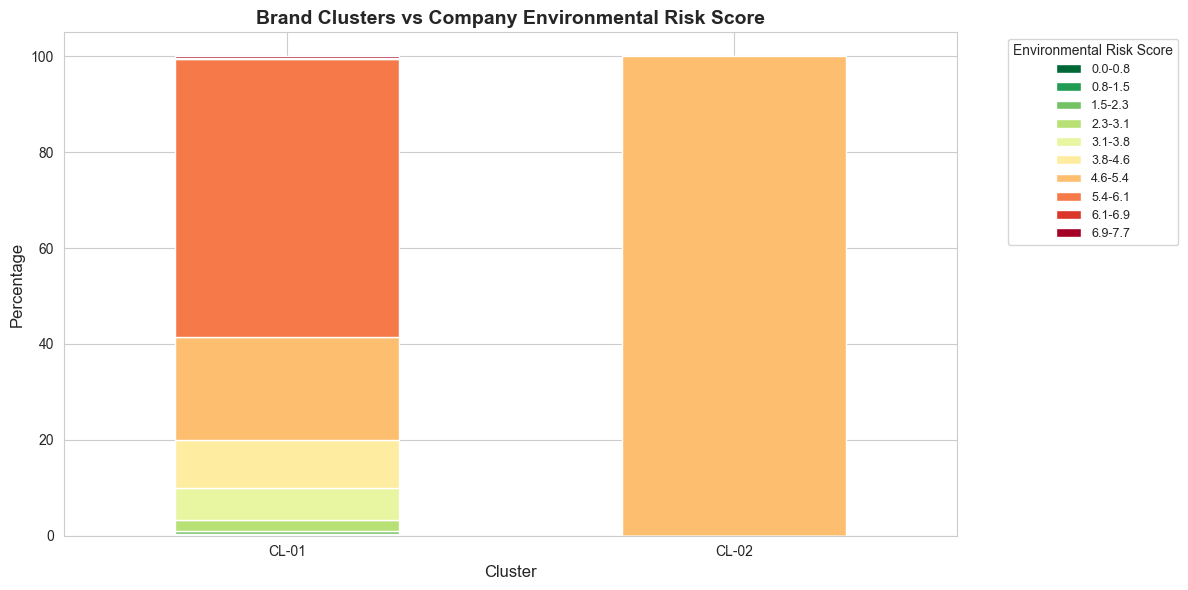

In [50]:
# Analyze the relationship between brand clusters and company-level greenwashing risk
if 'environmental_risk_score' in full_df.columns and 'segment_label' in full_df.columns:
    # Create binned categories for environmental risk score
    max_risk = full_df['environmental_risk_score'].max()
    bins = np.linspace(0, max_risk, 11)  # 11 edges = 10 bins
    labels = [f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)]
    
    # Create binned version of environmental risk score
    full_df['env_risk_binned'] = pd.cut(
        full_df['environmental_risk_score'], 
        bins=bins, 
        labels=labels,
        include_lowest=True
    )
    
    cross_tab = pd.crosstab(
        full_df['segment_label'],
        full_df['env_risk_binned'],
        normalize='index'
    ) * 100

    print("\nBrand Cluster vs Environmental Risk Score (% distribution within each cluster):")
    print(cross_tab.round(1))

    # Visualize
    fig, ax = plt.subplots(figsize=(12, 6))
    cross_tab.plot(kind='bar', stacked=True, ax=ax, colormap='RdYlGn_r')
    ax.set_xlabel('Cluster', fontsize=12)
    ax.set_ylabel('Percentage', fontsize=12)
    ax.set_title('Brand Clusters vs Company Environmental Risk Score', 
                 fontsize=14, fontweight='bold')
    ax.legend(title='Environmental Risk Score', bbox_to_anchor=(1.05, 1), fontsize=9)
    plt.xticks(rotation=0)  # Horizontal labels for short names
    plt.tight_layout()
    plt.show()
else:
    print("Required columns not found - run cluster labeling cell first")

In [51]:
# Export final results to CSV
output_cols = ['brand_name', 'company_name', 'industry_name',
               'kmeans_cluster', 'hierarchical_cluster', 'dbscan_cluster',
               'segment_label']

# Add optional columns if they exist
optional_cols = ['initial_greenwashing_level', 'scope12_total', 'revenues',
                'country_of_origin', 'electric_vehicles_percent',
                'major_sustainability_award_last5y']
output_cols.extend([col for col in optional_cols if col in full_df.columns])

export_df = full_df[output_cols]
export_df.to_csv('output/brand_clustering_results.csv', index=False)

print("Results exported to output/brand_clustering_results.csv")
print(f"\nExported {len(export_df)} brands with {len(output_cols)} columns")
print(f"\nColumns exported: {output_cols}")

Results exported to output/brand_clustering_results.csv

Exported 3605 brands with 13 columns

Columns exported: ['brand_name', 'company_name', 'industry_name', 'kmeans_cluster', 'hierarchical_cluster', 'dbscan_cluster', 'segment_label', 'initial_greenwashing_level', 'scope12_total', 'revenues', 'country_of_origin', 'electric_vehicles_percent', 'major_sustainability_award_last5y']



Brand Cluster vs Environmental Risk Score
(% distribution within each cluster):
risk_category  Low (<0.3)  High (>0.7)
segment_label                         
CL-01                 0.1         99.9
CL-02                 0.0        100.0


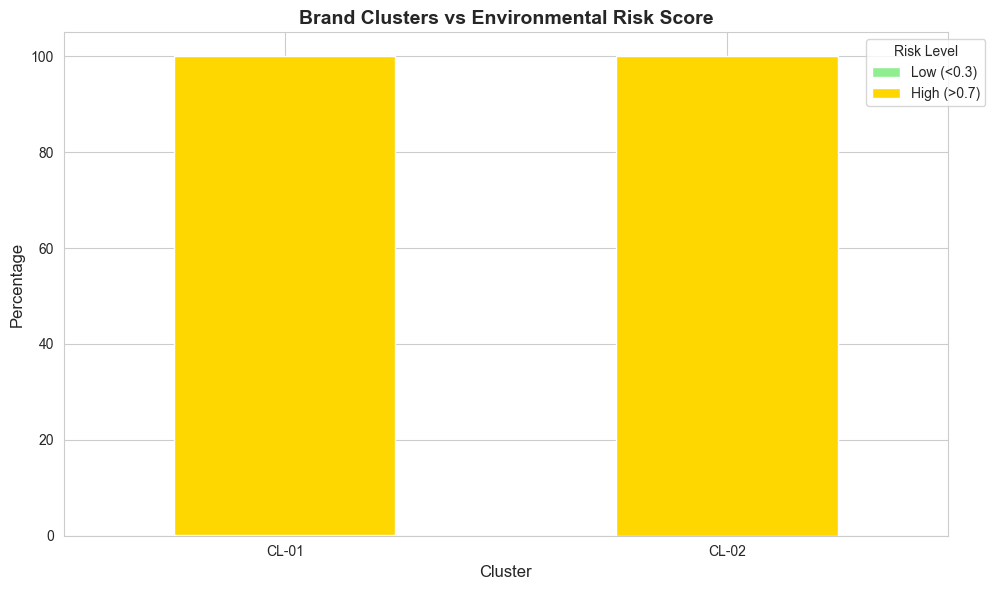


Average Environmental Risk Score per Cluster:
                mean    std   min   max
segment_label                          
CL-01          5.133  0.882  0.00  7.65
CL-02          4.750    NaN  4.75  4.75


In [44]:
# Analyze the relationship between brand clusters and combined greenwashing risk
greenwash_col = 'environmental_risk_score' if 'environmental_risk_score' in full_df.columns else 'initial_greenwashing_level'

if greenwash_col in full_df.columns and 'segment_label' in full_df.columns:
    # Create risk categories for better visualization
    def categorize_risk(value):
        if value > 0.7:
            return 'High (>0.7)'
        elif value >= 0.3:
            return 'Medium (0.3-0.7)'
        else:
            return 'Low (<0.3)'
    
    full_df['risk_category'] = full_df[greenwash_col].apply(categorize_risk)
    
    # Cross-tabulation
    cross_tab = pd.crosstab(
        full_df['segment_label'],
        full_df['risk_category'],
        normalize='index'
    ) * 100
    
    # Ensure columns are in the right order
    col_order = ['Low (<0.3)', 'Medium (0.3-0.7)', 'High (>0.7)']
    cross_tab = cross_tab.reindex(columns=[c for c in col_order if c in cross_tab.columns])

    print(f"\nBrand Cluster vs {greenwash_col.replace('_', ' ').title()}")
    print("(% distribution within each cluster):")
    print(cross_tab.round(1))

    # Visualize
    fig, ax = plt.subplots(figsize=(10, 6))
    cross_tab.plot(kind='bar', stacked=True, ax=ax, 
                   color=['lightgreen', 'gold', 'salmon'])
    ax.set_xlabel('Cluster', fontsize=12)
    ax.set_ylabel('Percentage', fontsize=12)
    ax.set_title(f'Brand Clusters vs {greenwash_col.replace("_", " ").title()}', 
                 fontsize=14, fontweight='bold')
    ax.legend(title='Risk Level', bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Also show average risk per cluster
    print(f"\nAverage {greenwash_col.replace('_', ' ').title()} per Cluster:")
    cluster_risk_avg = full_df.groupby('segment_label')[greenwash_col].agg(['mean', 'std', 'min', 'max'])
    print(cluster_risk_avg.round(3))
    
else:
    print("Required columns not found - run previous cells first")

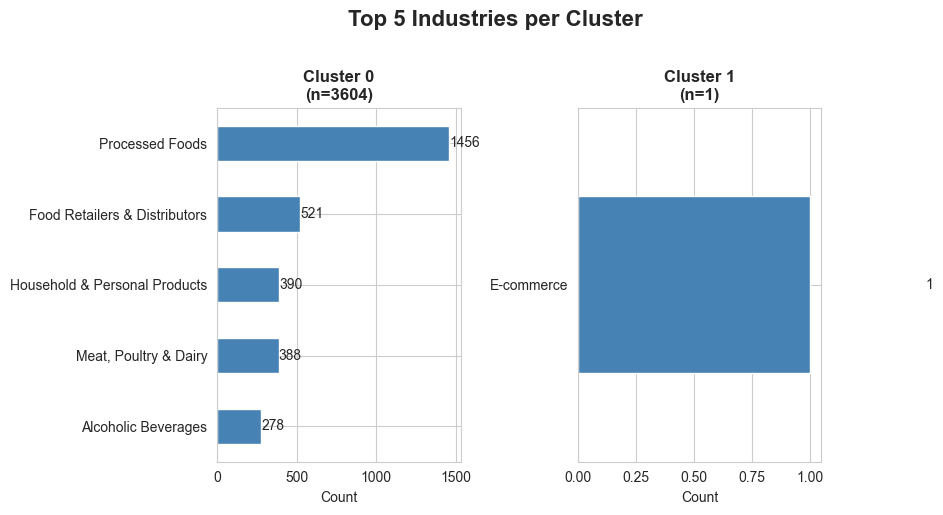

In [45]:
# Visualize Top 5 Industries per Cluster
if 'industry_name' in full_df.columns and 'hierarchical_cluster' in full_df.columns:
    n_clusters = full_df['hierarchical_cluster'].nunique()
    
    # Create subplots for each cluster
    fig, axes = plt.subplots(1, n_clusters, figsize=(5*n_clusters, 5))
    if n_clusters == 1:
        axes = [axes]
    
    for idx, cluster_id in enumerate(sorted(full_df['hierarchical_cluster'].unique())):
        cluster_data = full_df[full_df['hierarchical_cluster'] == cluster_id]
        top_industries = cluster_data['industry_name'].value_counts().head(5)
        
        ax = axes[idx]
        top_industries.plot(kind='barh', ax=ax, color='steelblue')
        ax.set_title(f'Cluster {cluster_id}\n(n={len(cluster_data)})', fontweight='bold')
        ax.set_xlabel('Count')
        ax.set_ylabel('')
        ax.invert_yaxis()
        
        # Add count labels on bars
        for i, v in enumerate(top_industries.values):
            ax.text(v + 0.5, i, str(v), va='center')
    
    plt.suptitle('Top 5 Industries per Cluster', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns not found")

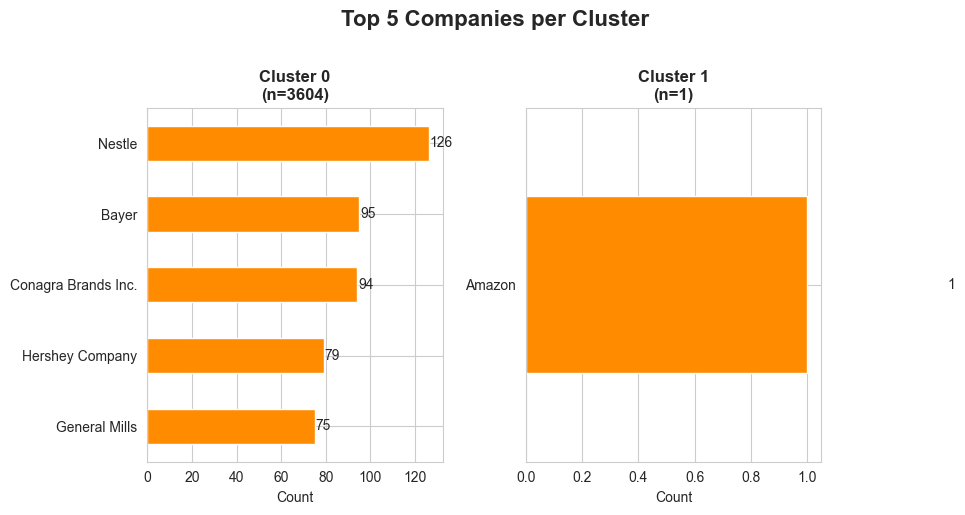

In [46]:
# Visualize Top 5 Companies per Cluster
if 'company_name' in full_df.columns and 'hierarchical_cluster' in full_df.columns:
    n_clusters = full_df['hierarchical_cluster'].nunique()
    
    # Create subplots for each cluster
    fig, axes = plt.subplots(1, n_clusters, figsize=(5*n_clusters, 5))
    if n_clusters == 1:
        axes = [axes]
    
    for idx, cluster_id in enumerate(sorted(full_df['hierarchical_cluster'].unique())):
        cluster_data = full_df[full_df['hierarchical_cluster'] == cluster_id]
        top_companies = cluster_data['company_name'].value_counts().head(5)
        
        ax = axes[idx]
        top_companies.plot(kind='barh', ax=ax, color='darkorange')
        ax.set_title(f'Cluster {cluster_id}\n(n={len(cluster_data)})', fontweight='bold')
        ax.set_xlabel('Count')
        ax.set_ylabel('')
        ax.invert_yaxis()
        
        # Add count labels on bars
        for i, v in enumerate(top_companies.values):
            ax.text(v + 0.5, i, str(v), va='center')
    
    plt.suptitle('Top 5 Companies per Cluster', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns not found")

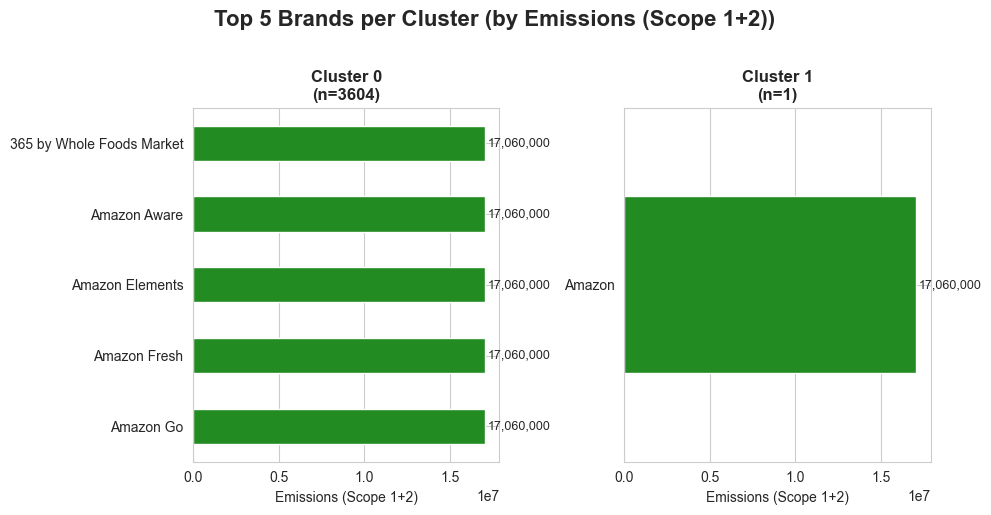

In [47]:
# Visualize Top 5 Brands per Cluster (by emissions or revenue)
if 'brand_name' in full_df.columns and 'hierarchical_cluster' in full_df.columns:
    n_clusters = full_df['hierarchical_cluster'].nunique()
    
    # Use scope12_total if available, otherwise just show top brands by count
    metric_col = 'scope12_total' if 'scope12_total' in full_df.columns else None
    metric_name = 'Emissions (Scope 1+2)' if metric_col else 'Brand Count'
    
    # Create subplots for each cluster
    fig, axes = plt.subplots(1, n_clusters, figsize=(5*n_clusters, 5))
    if n_clusters == 1:
        axes = [axes]
    
    for idx, cluster_id in enumerate(sorted(full_df['hierarchical_cluster'].unique())):
        cluster_data = full_df[full_df['hierarchical_cluster'] == cluster_id]
        
        if metric_col:
            # Sort by metric and get top 5
            top_brands = cluster_data.nlargest(5, metric_col)[['brand_name', metric_col]].set_index('brand_name')
            values = top_brands[metric_col]
        else:
            # Just count brand occurrences
            values = cluster_data['brand_name'].value_counts().head(5)
        
        ax = axes[idx]
        values.plot(kind='barh', ax=ax, color='forestgreen')
        ax.set_title(f'Cluster {cluster_id}\n(n={len(cluster_data)})', fontweight='bold')
        ax.set_xlabel(metric_name)
        ax.set_ylabel('')
        ax.invert_yaxis()
        
        # Add value labels on bars
        for i, v in enumerate(values.values):
            if metric_col:
                label = f'{v:,.0f}' if v >= 1000 else f'{v:.0f}'
            else:
                label = str(int(v))
            ax.text(v + (v * 0.01), i, label, va='center', fontsize=9)
    
    plt.suptitle(f'Top 5 Brands per Cluster (by {metric_name})', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns not found")

Top 3 Industries per Cluster:

Cluster 0 (n=3604):
  Processed Foods: 1456 (40.4%)
  Food Retailers & Distributors: 521 (14.5%)
  Household & Personal Products: 390 (10.8%)

Cluster 1 (n=1):
  E-commerce: 1 (100.0%)



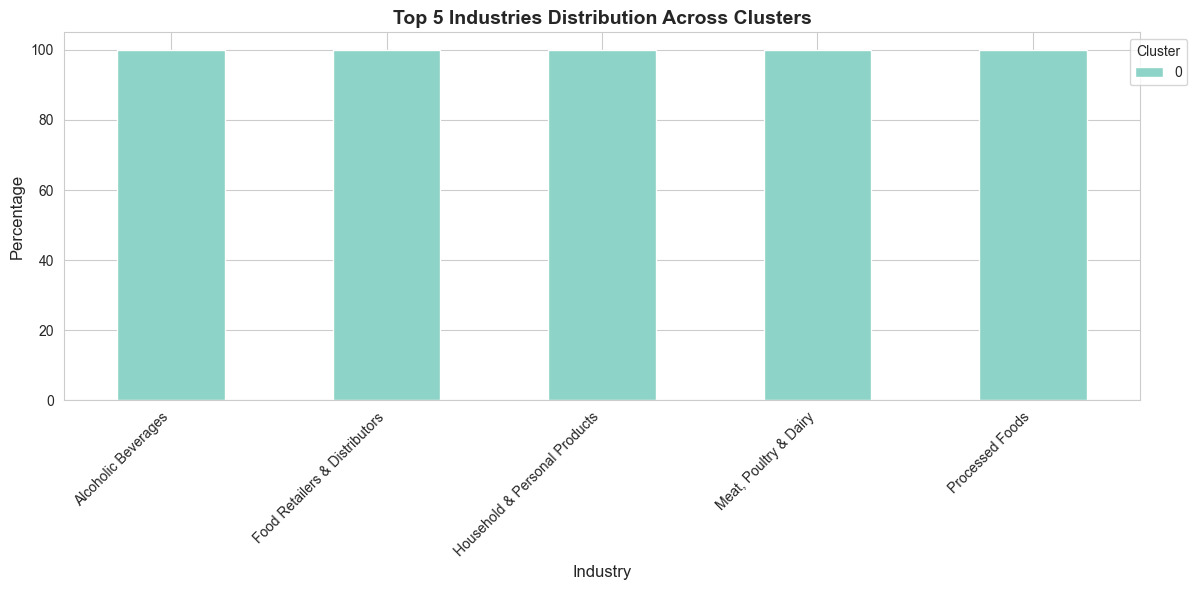

In [48]:
# Analyze how industries are distributed across clusters
if 'industry_name' in full_df.columns and 'hierarchical_cluster' in full_df.columns:
    # Show top 3 industries per cluster
    print("Top 3 Industries per Cluster:")
    print("="*60)
    for cluster_id in sorted(full_df['hierarchical_cluster'].unique()):
        cluster_data = full_df[full_df['hierarchical_cluster'] == cluster_id]
        top_industries = cluster_data['industry_name'].value_counts().head(3)
        print(f"\nCluster {cluster_id} (n={len(cluster_data)}):")
        for industry, count in top_industries.items():
            pct = (count / len(cluster_data)) * 100
            print(f"  {industry}: {count} ({pct:.1f}%)")
    
    # Visualize top 5 industries across clusters
    print("\n" + "="*60)
    top_industries = full_df['industry_name'].value_counts().head(5).index
    industry_subset = full_df[full_df['industry_name'].isin(top_industries)]
    
    industry_cluster_pct = pd.crosstab(
        industry_subset['industry_name'],
        industry_subset['hierarchical_cluster'],
        normalize='index'
    ) * 100
    
    fig, ax = plt.subplots(figsize=(12, 6))
    industry_cluster_pct.plot(kind='bar', stacked=True, ax=ax, colormap='Set3')
    ax.set_xlabel('Industry', fontsize=12)
    ax.set_ylabel('Percentage', fontsize=12)
    ax.set_title('Top 5 Industries Distribution Across Clusters', fontsize=14, fontweight='bold')
    ax.legend(title='Cluster', bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns not found")

# Project Summary & Conclusions

---

## Accomplishments

### Data Processing
- Successfully integrated **3,605 brands** across **243 unique companies** and **14 industries**
- Combined multiple data sources: industry ESG data, company emissions, brand demographics
- Engineered **environmental_risk_score** metric from multiple greenwashing and risk factors
- Handled missing values and normalized **25 features** across different scales

### Dimensionality Reduction
- Applied **PCA** to reduce noise and preserve 95% of variance (25 → 17 dimensions)
- Applied **t-SNE** for 2D visualization of high-dimensional brand space
- Identified key principal components driving brand differentiation:
  - **PC1 (15.07%)**: Environmental Risk Dimension (deforestation, labor exploitation, greenwashing)
  - **PC2 (12.21%)**: Scale & Sustainability Dimension (EV%, loyalty index, revenue, employees)
  - **PC3 (10.71%)**: Corporate Size Dimension (revenue, employees, market cap)
  - **PC4 (10.30%)**: Income Demographics Dimension (income targeting patterns)

### Clustering Analysis
- Implemented and compared **3 clustering algorithms** with systematic hyperparameter tuning
- Applied multi-metric evaluation (Silhouette, Calinski-Harabasz, Davies-Bouldin)
- Tested **114 K-Means**, **57 Hierarchical**, and **84 DBSCAN** parameter combinations

### Deliverables
- Exportable CSV with cluster assignments for all brands
- Comprehensive visualizations (PCA variance, t-SNE plots, cluster profiles)

---

## Clustering Results: My Honest Assessment


| Algorithm | Clusters | Silhouette | Distribution | Key Observation |
|-----------|----------|------------|--------------|-----------------|
| **K-Means** | 5 | 0.658 | 3,092 / 213 / 153 / 146 / 1 | One dominant cluster (86%) + one singleton |
| **Hierarchical** | 2 | 0.943 | 3,604 / 1 | Effectively a single cluster + 1 outlier |
| **DBSCAN** | 10 | 0.683 | Various (20-1,777) | 13.3% noise (481 brands) |

The results diverge from my initial expectations. Rather than discovering distinct, well-separated market segments, the algorithms suggest that **the brand space is largely continuous rather than discretely segmented**.

---

## Failure or Not Failure?

Well, my analysis rendered challenging results, but despite the unexpected cluster distributions, this project delivers genuine value.

Here's why:

### 1. The Finding *IS* the Insight
My discovery that brands don't naturally segment into distinct groups is itself meaningful:
- According to the study, brand differentiation operates on continuous spectra rather than discrete categories
- ESG positioning, demographics, and operational characteristics form a dense, interconnected space
- Traditional market segmentation *may* impose artificial boundaries that don't reflect reality

### 2. Methodology and its Rigor, well demonstrated
- I performed comprehensive feature engineering (25 selected features across 8 categories)
- Systematic hyperparameter tuning (255 total parameter combinations tested)
- Principal Component Analysis revealed interpretable **latent dimensions**
- Proper validation using multiple complementary metrics

### 3. Outlier and Noise Detection
DBSCAN's noise classification (481 brands, 13.3%) identifies brands worth individual investigation—those that don't conform to patterns may represent unique market positions or data quality issues. Outliers showed notably higher revenue ($92,658 vs $30,893 avg) and emissions (2.46M vs 0.84M avg) compared to core clusters.

### 4. Foundation for my Future Work
The preprocessed, scaled, and dimensionally-reduced dataset provides a clean starting point for more sophisticated analyses. My plans are to continue this study at the next level, Deep Learning.

---

## Acknowledgement of Limitations

- **Feature Space**: The 25 features may not capture the dimensions that truly differentiate brands in meaningful ways
- **Data Homogeneity**: Brands within this ESG database proved to be inherently similar; The reason is that they were pre-selected for sustainability reporting purposes
- **Scale Imbalance**: My finding of one dominant cluster across all algorithms confirms at least one of the hypotheses: the data is either homogeneous or suboptimal

---

## Future Enhancement: Deep Learning with GANs (Potentially Pretrained)

This unsupervised learning project serves as a foundation for the upcoming **Deep Learning final project**, where the plan is to:

### 1. Use Clusters as Pseudo-Labels
The K-Means 5-cluster solution, despite its imbalance, provides initial class labels for supervised approaches.

### 2. Address Class Imbalance with GANs
**Generative Adversarial Networks** can synthesize new samples for underrepresented clusters:
- The K-Means clusters 1-4 (213, 153, 146, 1 brands) are severely underrepresented vs Cluster 0 (3,092)
- GANs can generate realistic *synthetic* brand profiles to balance training data
- This will enable training to be more robust, and classifiers will work better for brand segment prediction

### 3. Improved Segmentation
With balanced, augmented data, deep learning models may discover finer-grained patterns that traditional clustering missed.

### 4. Validation Pipeline
The augmented dataset can train and evaluate classification models, with held-out original data serving as ground truth.

### 5. Another round of Unsupervised Learning
At the end, the generated augmented dataset can be re-analyzed using this pipeline to evaluate the Cluster distribution.

---

## Conclusion

**This project is not a waste of effort.** While the clustering results fell short of discovering dramatically distinct brand segments, the work accomplished legitimate goals:

- Demonstrated mastery of unsupervised learning techniques and proper application
- Revealed an honest truth about the data: brand differentiation is subtler than expected
- Produced a clean, engineered dataset ready for advanced analysis
- Identified the class imbalance problem that GANs can directly address

In data science, **negative or unexpected results are still results**. The discovery that traditional clustering struggles with this brand space is actionable intelligence—it tells us that brand segmentation may require different features, different algorithms (soft clustering, topic models), or the deep learning approaches planned for the next phase.

**The journey continues in the Deep Learning project.**

---

# References

## Academic Papers & Books

1. **Jain, A. K. (2010).** *Data clustering: 50 years beyond K-means.* Pattern Recognition Letters, 31(8), 651-666. https://doi.org/10.1016/j.patrec.2009.09.011

2. **Hartigan, J. A., & Wong, M. A. (1979).** *Algorithm AS 136: A K-Means Clustering Algorithm.* Journal of the Royal Statistical Society. Series C (Applied Statistics), 28(1), 100-108.

3. **Ester, M., Kriegel, H. P., Sander, J., & Xu, X. (1996).** *A density-based algorithm for discovering clusters in large spatial databases with noise.* In KDD-96 Proceedings, 226-231.

4. **van der Maaten, L., & Hinton, G. (2008).** *Visualizing Data using t-SNE.* Journal of Machine Learning Research, 9, 2579-2605.

5. **Jolliffe, I. T., & Cadima, J. (2016).** *Principal component analysis: a review and recent developments.* Philosophical Transactions of the Royal Society A, 374(2065), 20150202.

6. **Rousseeuw, P. J. (1987).** *Silhouettes: A graphical aid to the interpretation and validation of cluster analysis.* Journal of Computational and Applied Mathematics, 20, 53-65.

## Technical Documentation

7. **Pedregosa, F., et al. (2011).** *Scikit-learn: Machine Learning in Python.* Journal of Machine Learning Research, 12, 2825-2830. https://scikit-learn.org/stable/

8. **scikit-learn Documentation.** *Clustering.* https://scikit-learn.org/stable/modules/clustering.html

9. **scikit-learn Documentation.** *Decomposition (PCA).* https://scikit-learn.org/stable/modules/decomposition.html

## Clustering Evaluation Metrics

10. **Caliński, T., & Harabasz, J. (1974).** *A dendrite method for cluster analysis.* Communications in Statistics, 3(1), 1-27.

11. **Davies, D. L., & Bouldin, D. W. (1979).** *A Cluster Separation Measure.* IEEE Transactions on Pattern Analysis and Machine Intelligence, PAMI-1(2), 224-227.

## Online Resources & Tutorials

12. **Google Developers.** *Clustering in Machine Learning.* https://developers.google.com/machine-learning/clustering

13. **Towards Data Science.** *The 5 Clustering Algorithms Data Scientists Need to Know.* https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

14. **StatQuest with Josh Starmer.** *K-means clustering.* https://www.youtube.com/watch?v=4b5d3muPQmA

## Data Sources

15. **The GHG Shopper application.** https://ghgshopper.org
